<a href="https://colab.research.google.com/github/zahrahaulia21/zahrahaulia_portfolio/blob/main/Data%20Mining%20on%20Mental%20Health%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama Kelompok 4 :**
- Aulia Shinta Madani (2106724984)
- Christi Novelina Panggabean (2106725021)
- Nadia Amelia Kirana (2106653224)
- Nadia Sukesi Sianipar (2106700776)
- Zahrah Aulia Putri (2106724896)

<center><h2><strong><font color="blue">Tugas UAS Data Mining</font></strong></h2></center>

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
!pip install kmodes
from kmodes.kmodes import KModes

In [ ]:
url = 'https://raw.githubusercontent.com/zahrahaulia21/UAS-Datmin/main/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx?raw=true'
df = pd.read_excel(url)

In [ ]:
data1=df.copy()

In [ ]:
data1.head()

,ID,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,1,KALBAR,LAKI - LAKI,34.0,16.0,SMA,168.9,85.0,100.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.796114,Obesitas
1,2,KALBAR,LAKI - LAKI,43.0,23.0,SMA,169.5,70.0,80.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.364563,Normal
2,3,KALBAR,LAKI - LAKI,21.0,1.0,SMA,169.5,60.0,78.0,Belum Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,NaN,Tidak ada,15 - 24,20.883912,Normal
3,4,KALBAR,LAKI - LAKI,40.0,23.0,S2,166.8,80.0,34.0,Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,28.753975,Obesitas
4,5,KALBAR,LAKI - LAKI,28.0,9.0,SMA,164.5,62.0,32.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,25 - 34,22.911836,Normal


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

# Cleaning / Cleansing Data

Penanganan missing value dan outlier dilakukan selanjutnya berdasarkan metode yang ingin dilakukan.

Kolom ID hanya berisikan nomor observasi sehingga kolom ini akan dihapus.

In [ ]:
data1 = data1.drop('ID',axis=1)

## Kolom Tipe Numerik selain Pertanyaan

In [ ]:
data1[['USIA','LAMA BERDINAS','TINGGI BADAN','BERAT BADAN','LINGKAR PINGGANG','NILAI IMT']].isnull().sum()

USIA                0
LAMA BERDINAS       0
TINGGI BADAN        0
BERAT BADAN         0
LINGKAR PINGGANG    0
NILAI IMT           7
dtype: int64

### Kolom Usia

In [ ]:
data1['USIA'] = data1['USIA'].astype(int)

In [ ]:
data1['USIA'].unique()

array([      34,       43,       21,       40,       28,       47,
             41,       23,       19,       22,       25,       46,
             39,       50,       55,       26,       42,       32,
             44,       31,       37,       24,       27,       57,
             53,       56,       20,       36,       49,       51,
             29,       54,       38,       48,       45,       30,
             52,       35,       33,       58,       15,       16,
             17,     5429,       18,       81,       83,       59,
             80,       85,       88,      100,       64,       78,
             77,       67,      371,       79,       61,       72,
           5431,       68,       99,       66,       90,     4120,
             70,      442,       92,     5633,       69,       75,
             93,       87,  8011996,       97,      382,       60,
             89,       84,      422,       82,     4626,       62,
           4323,       76,     4325,     4826,       96,      

Untuk nilai USIA lebih dari 100, akan diasumsikan untuk mengambil dua nilai paling depan. Di sisi lain, terdapat nilai yang berupa tanggal lahir sehingga nilai untuk kolom USIA akan diperoleh dengan mengurangi tahun 2023 dengan tahun lahir individu tersebut.

In [ ]:
for i in range(len(data1['USIA'])):
    # Periksa apakah nilai di antara 100 dan 10000
    if 100 < data1['USIA'][i] < 10000:
      # Ubah nilai menjadi dua angka paling depan
      data1['USIA'][i] = int(str(data1['USIA'][i])[:2])

<ipython-input-10-8447da23bddf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['USIA'][i] = int(str(data1['USIA'][i])[:2])


In [ ]:
# untuk mengganti nilai USIA berdasarkan tahun lahir
for i in range(len(data1['USIA'])):
    if 1000000 < data1['USIA'][i] < 100000000:
        data1['USIA'][i] = 2023 - int(str(data1['USIA'][i])[-4:])

data1['USIA'] = data1['USIA'].replace({462525:46, 280701:24})
data1['USIA'].unique()

<ipython-input-11-a0817b45c6ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['USIA'][i] = 2023 - int(str(data1['USIA'][i])[-4:])


array([ 34,  43,  21,  40,  28,  47,  41,  23,  19,  22,  25,  46,  39,
        50,  55,  26,  42,  32,  44,  31,  37,  24,  27,  57,  53,  56,
        20,  36,  49,  51,  29,  54,  38,  48,  45,  30,  52,  35,  33,
        58,  15,  16,  17,  18,  81,  83,  59,  80,  85,  88, 100,  64,
        78,  77,  67,  79,  61,  72,  68,  99,  66,  90,  70,  92,  69,
        75,  93,  87,  97,  60,  89,  84,  82,  62,  76,  96,  86,  65,
        63,  73,  71,  95,  94,  74,   0])

### Kolom Tinggi Badan

In [ ]:
data1['TINGGI BADAN'].unique()

array([168.9, 169.5, 166.8, 164.5, 165.5, 168.5, 175, 172.5, 166.5, 166,
       172, 167, 175.8, 163.5, 167.8, 72.5, 168.8, 174.5, 161, 172.6,
       160.5, 175.5, 171.5, 17, 165, 170, 150, 165.9, 156, 168, 167.5,
       166.3, 159.5, 169, 173.5, 171, 1.65, 166.9, 176.5, 1.71, 166.6,
       1.76, 171.3, 156.5, 157.5, '17,1 ', 160, 1.75, 1.66, 1.72, 1.68,
       162.5, '17,5', 177.5, 169.2, 178, 176, 180.5, '16,6', 1.7, 178.5,
       167.2, 171.8, 170.3, 165.4, 1.69, 173.4, 170.2, '15,5', 182, 158.5,
       185.5, 158, 164.4, 165.7, 167.6, 1.64, 161.5, 179.5, 165.58, 169.7,
       168.2, 1.77, 173, 170.5, '17,6', 163, '16,7', 164, 171.6, 176.6,
       16.39, 188.5, 173.8, 172.8, 164.7, 155, 174.8, 168.58, 5, 174, 153,
       180, 181, 16, 177, 162, 159, 187, 15, 179, 185, 151, 157, 18, 152,
       26, 20, 148, 154, 19, 72, 23, 30, 29, 32, 33, 35, 39, 38, 65, 63,
       67, 68, 69, 71, 70, 45, 46, 76, 75, 53, 183, 78, 80, 55, 57, 60,
       84, 62, 66, 59, 56, 145, 64, 54, 74, 73, 61, 79

Penulisan tinggi badan seperti '1.66' diasumsikan dalam satuan meter sehingga akan diubah menjadi dalam satuan centimeter. Sedangkan penulisan seperti '15,5' diasumsikan dalam satuan desimeter sehingga akan diubah menjadi dalam satuan centimeter. Di sisi lain, terdapat beberapa nilai tinggi badan yang berada di range 20 sampai 100. Pada kasus seperti itu, kami asumsikan bahwa terjadi kesalahan penulisan misalnya 72 seharusnya 172. Oleh karena itu, akan dilakukan perbaikan sesuai dengan asumsi yang ditetapkan.

In [ ]:
data1['TINGGI BADAN'] = data1['TINGGI BADAN'].replace({'17,1 ':171, '17,5':175, '16,6':166, '15,5':155, '17,6':176,
                                           '16,7':167})

In [ ]:
# untuk penulisan seperti '1.66'
for i in range(len(data1['TINGGI BADAN'])):
    if data1['TINGGI BADAN'][i] < 2:
        data1['TINGGI BADAN'][i] = (data1['TINGGI BADAN'][i])*100

<ipython-input-14-b42b5b3bc4da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['TINGGI BADAN'][i] = (data1['TINGGI BADAN'][i])*100


In [ ]:
# untuk penulisan seperti '15.5'
for i in range(len(data1['TINGGI BADAN'])):
    if 10 < data1['TINGGI BADAN'][i] < 20:
        data1['TINGGI BADAN'][i] = (data1['TINGGI BADAN'][i])*10

<ipython-input-15-a9cd582e93fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['TINGGI BADAN'][i] = (data1['TINGGI BADAN'][i])*10


In [ ]:
# untuk kesalahan penulisan pada range 20 sampai 100
for i in range(len(data1['TINGGI BADAN'])):
    if 20 <= data1['TINGGI BADAN'][i] < 100:
        data1['TINGGI BADAN'][i] = (data1['TINGGI BADAN'][i]) + 100

<ipython-input-16-289acf3ec08d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['TINGGI BADAN'][i] = (data1['TINGGI BADAN'][i]) + 100


In [ ]:
data1['TINGGI BADAN'] = data1['TINGGI BADAN'].replace({1799:179.9})

In [ ]:
data1['TINGGI BADAN'].unique()

array([168.9 , 169.5 , 166.8 , 164.5 , 165.5 , 168.5 , 175.  , 172.5 ,
       166.5 , 166.  , 172.  , 167.  , 175.8 , 163.5 , 167.8 , 168.8 ,
       174.5 , 161.  , 172.6 , 160.5 , 175.5 , 171.5 , 170.  , 165.  ,
       150.  , 165.9 , 156.  , 168.  , 167.5 , 166.3 , 159.5 , 169.  ,
       173.5 , 171.  , 166.9 , 176.5 , 166.6 , 176.  , 171.3 , 156.5 ,
       157.5 , 160.  , 162.5 , 177.5 , 169.2 , 178.  , 180.5 , 178.5 ,
       167.2 , 171.8 , 170.3 , 165.4 , 173.4 , 170.2 , 155.  , 182.  ,
       158.5 , 185.5 , 158.  , 164.4 , 165.7 , 167.6 , 164.  , 161.5 ,
       179.5 , 165.58, 169.7 , 168.2 , 177.  , 173.  , 170.5 , 163.  ,
       171.6 , 176.6 , 163.9 , 188.5 , 173.8 , 172.8 , 164.7 , 174.8 ,
       168.58,   5.  , 174.  , 153.  , 180.  , 181.  , 162.  , 159.  ,
       187.  , 179.  , 185.  , 151.  , 157.  , 152.  , 126.  , 120.  ,
       148.  , 154.  , 190.  , 123.  , 130.  , 129.  , 132.  , 133.  ,
       135.  , 139.  , 138.  , 145.  , 146.  , 183.  , 184.  , 186.  ,
      

In [ ]:
data1['TINGGI BADAN'] = data1['TINGGI BADAN'].astype(float)

### Kolom Lama Berdinas

In [ ]:
data1['LAMA BERDINAS'].unique()

array([1.6000000e+01, 2.3000000e+01, 1.0000000e+00, 9.0000000e+00,
       2.5000000e+01, 2.0000000e+01, 1.0000000e+01, 3.0000000e+00,
       2.0000000e+00, 2.9000000e+01, 2.8000000e+01, 3.4000000e+01,
       7.0000000e+00, 1.9000000e+01, 3.3000000e+01, 2.4000000e+01,
       2.2000000e+01, 2.6000000e+01, 1.1000000e+01, 1.8000000e+01,
       4.0000000e+00, 5.0000000e+00, 6.0000000e+00, 3.1000000e+01,
       8.0000000e+00, 2.7000000e+01, 3.2000000e+01, 1.7000000e+01,
       1.3000000e+01, 3.0000000e+01, 2.1000000e+01, 0.0000000e+00,
       3.5000000e+01, 1.5000000e+01, 1.5000000e+00, 3.6000000e+01,
       1.6000000e+00, 5.2000000e+01, 4.4000000e+01, 3.7000000e+01,
       1.6700000e+01, 1.7000000e+00, 3.8000000e+01, 4.3000000e+01,
       4.7000000e+01, 5.5000000e+01, 4.1000000e+01, 5.4000000e+01,
       9.7000000e+01, 5.1000000e+01, 4.8000000e+01, 5.8000000e+01,
       3.9000000e+01, 5.3000000e+01, 5.6000000e+01, 1.4000000e+01,
       5.7000000e+01, 1.2000000e+01, 4.6000000e+01, 4.2000000e

Pada kolom LAMA BERDINAS, terdapat beberapa nilai yang lebih dari 1000, tentu saja nilai ini tidak masuk akal. Setelah dilihat kembali datanya, kemungkinan besar nilai-nilai tersebut merupakan tahun masuk/keluar dari dinas sehingga akan dilakukan perbaikan berdasarkan asumsi yang ditetapkan.

In [ ]:
data1['LAMA BERDINAS'] = data1['LAMA BERDINAS'].astype(int)

In [ ]:
for i in range(len(data1['LAMA BERDINAS'])):
    if 1000 < data1['LAMA BERDINAS'][i] < 100000000:
        data1['LAMA BERDINAS'][i] = np.abs(2023 - int(str(data1['LAMA BERDINAS'][i])[-4:]))

<ipython-input-22-03a32bc68542>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['LAMA BERDINAS'][i] = np.abs(2023 - int(str(data1['LAMA BERDINAS'][i])[-4:]))


In [ ]:
data1['LAMA BERDINAS'].unique()

array([ 16,  23,   1,   9,  25,  20,  10,   3,   2,  29,  28,  34,   7,
        19,  33,  24,  22,  26,  11,  18,   4,   5,   6,  31,   8,  27,
        32,  17,  13,  30,  21,   0,  35,  15,  36,  52,  44,  37,  38,
        43,  47,  55,  41,  54,  97,  51,  48,  58,  39,  53,  56,  14,
        57,  12,  46,  42,  90,  99,  50,  87,  45,  49,  40,  93,  80,
        98,  96,  91,  95,  94,  88,  76,  86,  92,  60,  89,  75,  81,
        78,  85,  64,  70, 100,  72,  82,  84,  83,  65,  68, 180,  74,
       170,  59,  79,  71])

### Kolom Berat Badan

In [ ]:
data1['BERAT BADAN'].unique()

array([8.5000e+01, 7.0000e+01, 6.0000e+01, 8.0000e+01, 6.2000e+01,
       6.3000e+01, 7.1000e+01, 6.9550e+01, 7.4000e+01, 8.2000e+01,
       5.3000e+01, 5.4500e+01, 7.0650e+01, 7.8000e+01, 7.2000e+01,
       6.5000e+01, 7.5000e+01, 8.4000e+01, 6.8000e+01, 8.9000e+01,
       5.7500e+01, 5.0000e+01, 7.3000e+01, 4.5500e+01, 5.8000e+01,
       5.6000e+01, 5.2500e+01, 6.7700e+00, 5.9500e+01, 8.3000e+01,
       6.7000e+01, 6.6500e+01, 7.3500e+01, 6.9000e+01, 7.6000e+01,
       5.2000e+01, 9.0000e+01, 9.8000e+01, 8.7000e+01, 8.3500e+01,
       5.9000e+01, 8.6000e+01, 9.5000e+01, 7.9000e+01, 7.5500e+01,
       6.6000e+01, 7.8500e+01, 6.9500e+01, 7.7300e+01, 6.2500e+01,
       8.5200e+01, 9.2000e+01, 5.4000e+01, 7.1600e+01, 6.8500e+01,
       5.1500e+01, 8.7600e+01, 5.8500e+01, 8.0100e+01, 5.5000e+01,
       6.2100e+01, 7.1800e+01, 7.0500e+01, 1.1500e+02, 6.3500e+01,
       5.7000e+01, 8.8000e+01, 9.8500e+01, 6.4000e+01, 7.1200e+01,
       8.1000e+01, 7.0410e+03, 9.4000e+01, 9.5800e+01, 5.6500e

Terdapat berat badan lebih dari 1000. Hal ini tidak masuk akal karena berdasarkan informasi yang didapatkan, manusia terberat di dunia memiliki berat hanya sampai 228 kg, (https://www.viva.co.id/berita/dunia/1608459-pria-ini-menjadi-manusia-terberat-di-dunia-beratnya-sampai-590-kg#:~:text=Kisah%20Juan&text=Ketika%20berusia%2017%2C%20beratnya%20mencapai,tidak%20bisa%20berjalan%20ke%20toilet.). Akan diasumsikan bahwa terdapat kesalahan penulisan seperti 7041 seharusnya adalah 70.41. Oleh karena itu, akan dilakukan perbaikan berdasarkan asumsi yang ditetapkan.

In [ ]:
for i in range(len(data1['BERAT BADAN'])):
    if 300 < data1['BERAT BADAN'][i] < 1000:
        data1['BERAT BADAN'][i] = (data1['BERAT BADAN'][i]) / 10
    elif 1000 < data1['BERAT BADAN'][i] < 10000:
        data1['BERAT BADAN'][i] = (data1['BERAT BADAN'][i]) / 100
    elif 10000 < data1['BERAT BADAN'][i] < 100000:
        data1['BERAT BADAN'][i] = (data1['BERAT BADAN'][i]) / 1000

<ipython-input-25-c825b91a2253>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['BERAT BADAN'][i] = (data1['BERAT BADAN'][i]) / 100
<ipython-input-25-c825b91a2253>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['BERAT BADAN'][i] = (data1['BERAT BADAN'][i]) / 1000
<ipython-input-25-c825b91a2253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['BERAT BADAN'][i] = (data1['BERAT BADAN'][i]) / 10


In [ ]:
data1['BERAT BADAN'].unique()

array([ 85.   ,  70.   ,  60.   ,  80.   ,  62.   ,  63.   ,  71.   ,
        69.55 ,  74.   ,  82.   ,  53.   ,  54.5  ,  70.65 ,  78.   ,
        72.   ,  65.   ,  75.   ,  84.   ,  68.   ,  89.   ,  57.5  ,
        50.   ,  73.   ,  45.5  ,  58.   ,  56.   ,  52.5  ,   6.77 ,
        59.5  ,  83.   ,  67.   ,  66.5  ,  73.5  ,  69.   ,  76.   ,
        52.   ,  90.   ,  98.   ,  87.   ,  83.5  ,  59.   ,  86.   ,
        95.   ,  79.   ,  75.5  ,  66.   ,  78.5  ,  69.5  ,  77.3  ,
        62.5  ,  85.2  ,  92.   ,  54.   ,  71.6  ,  68.5  ,  51.5  ,
        87.6  ,  58.5  ,  80.1  ,  55.   ,  62.1  ,  71.8  ,  70.5  ,
       115.   ,  63.5  ,  57.   ,  88.   ,  98.5  ,  64.   ,  71.2  ,
        81.   ,  70.41 ,  94.   ,  95.8  ,  56.5  ,  84.6  ,  78.36 ,
        60.8  ,  64.4  ,  68.9  ,  53.8  ,  90.7  , 180.   , 179.   ,
       176.   , 175.   , 173.   , 172.   , 171.   , 170.   , 169.   ,
       168.   , 167.   , 166.   , 165.   , 164.   , 163.   , 152.   ,
       110.   , 100.

### Kolom Lingkar Pinggang

In [ ]:
data1['LINGKAR PINGGANG'].unique()

array([ 1.000e+02,  8.000e+01,  7.800e+01,  3.400e+01,  3.200e+01,
        9.000e+01,  3.100e+01,  4.500e+01,  3.000e+01,  3.300e+01,
        7.500e+01,  8.500e+01,  5.500e+01,  6.200e+01,  8.200e+01,
        1.020e+02,  9.800e+01,  1.100e+02,  6.700e+01,  7.000e+01,
        2.900e+01,  3.800e+01,  7.200e+01,  3.500e+01,  6.800e+01,
        6.000e+01,  8.300e+01,  7.900e+01,  7.300e+01,  8.900e+01,
        1.080e+02,  9.500e+01,  5.800e+01,  9.900e+01,  9.100e+01,
        7.400e+01,  7.600e+01,  6.300e+01,  2.800e+01,  3.600e+01,
        4.200e+01,  8.800e+01,  9.200e+01,  4.000e+01,  6.500e+01,
        5.300e+01,  4.600e+01,  9.400e+01,  6.100e+01,  9.600e+01,
        6.600e+01,  0.000e+00,  4.100e+01,  8.600e+01,  4.800e+01,
        6.400e+01,  1.200e+02,  3.700e+01,  8.100e+01,  3.900e+01,
        1.050e+02,  1.010e+02,  7.100e+01,  7.700e+01,  7.250e+01,
        4.300e+01,  1.150e+02,  8.400e+01,  1.730e+02,  1.210e+02,
        1.420e+02,  1.030e+02,  1.700e+02,  1.120e+02,  9.300e

Terdapat nilai negatif pada kolom LINGKAR PINGGANG. Diasumsikan terdapat kesalahan penulisan sehingga akan dilakukan perbaikan.

In [ ]:
for i in range(len(data1['LINGKAR PINGGANG'])):
    if data1['LINGKAR PINGGANG'][i] < 0:
        data1['LINGKAR PINGGANG'][i] = np.abs(df['LINGKAR PINGGANG'][i])
data1['LINGKAR PINGGANG'] = data1['LINGKAR PINGGANG'].replace({0.75:75})

<ipython-input-28-cdbb674f3f8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['LINGKAR PINGGANG'][i] = np.abs(df['LINGKAR PINGGANG'][i])


## Kolom Tipe Kategorik

In [ ]:
data1[['WILAYAH','JENIS KELAMIN','PENDIDIKAN TERAKHIR','Status Perkawinan','PENGELUARAN/BULAN','Kelompok Umur','IMT']].isnull().sum()

WILAYAH                0
JENIS KELAMIN          0
PENDIDIKAN TERAKHIR    0
Status Perkawinan      0
PENGELUARAN/BULAN      0
Kelompok Umur          0
IMT                    7
dtype: int64

In [ ]:
for i in data1[['WILAYAH','JENIS KELAMIN','PENDIDIKAN TERAKHIR','Status Perkawinan','PENGELUARAN/BULAN','Kelompok Umur']].columns:
  print(i,data1[i].unique())

WILAYAH ['KALBAR' 'BENGKULU' 'SULSEL' 'SULUT' 'KEPRI' 'NTT' 'JATIM' 'SULTENG'
 'JAMBI' 'SUMUT' 'JABAR' 'ACEH' 'BALI' 'BANTEN' 'DIY' 'GORONTALO' 'JATENG'
 'KALSEL' 'KALTENG' 'KALTIM' 'KALTARA' 'BABEL' 'LAMPUNG' 'MALUKU' 'MALUT'
 'METROJAYA' 'NTB' 'PAPUA' 'PABAR' 'RIAU' 'SULBAR' 'SULTRA' 'SUMBAR'
 'SUMSEL']
JENIS KELAMIN ['LAKI - LAKI' 'PEREMPUAN']
PENDIDIKAN TERAKHIR ['SMA' 'S2' 'SMP' 'S1' 'D3' 'S3']
Status Perkawinan ['Menikah' 'Belum Menikah' 'Duda' 'Janda']
PENGELUARAN/BULAN ['Rp. 7 Juta s.d. 10 Juta' 'Rp. 2 Juta s.d. 6 Juta'
 'Rp. 11 Juta s.d. 14 Juta' 'Di atas Rp. 15 Juta']
Kelompok Umur ['25 - 34' '35 - 44' '15 - 24' '45 - 54' '55 - 64' '≥ 65']


In [ ]:
data1[['WILAYAH','JENIS KELAMIN','PENDIDIKAN TERAKHIR','Status Perkawinan','PENGELUARAN/BULAN']] = data1[['WILAYAH','JENIS KELAMIN','PENDIDIKAN TERAKHIR','Status Perkawinan','PENGELUARAN/BULAN']].astype('category')

### Kolom Kelompok Umur

Akan dibuat kolom Kelompok Umur Baru berdasarkan hasil perbaikan pada kolom USIA sehingga kolom Kelompok Umur akan didrop.

In [ ]:
def kelompok_umur(usia):
    if 25 <= usia <= 34:
        return '25 - 34'
    elif 35 <= usia <= 44:
        return '35 - 44'
    elif 15 <= usia <= 24:
        return '15 - 24'
    elif 45 <= usia <= 54:
        return '45 - 54'
    elif 55 <= usia <= 64:
        return '55 - 64'
    elif 65 <= usia :
        return '≥ 65'
    else:
        return 'lainnya'
data1['Kelompok Umur Baru'] = data1['USIA'].apply(kelompok_umur)
data1['Kelompok Umur Baru'].unique()

array(['25 - 34', '35 - 44', '15 - 24', '45 - 54', '55 - 64', '≥ 65',
       'lainnya'], dtype=object)

In [ ]:
data1.drop(['Kelompok Umur'], axis=1, inplace=True)

In [ ]:
data1['Kelompok Umur Baru'] = data1['Kelompok Umur Baru'].astype('category')

## Pertanyaan

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 78 columns):
 #   Column                                                                                                             Non-Null Count   Dtype   
---  ------                                                                                                             --------------   -----   
 0   WILAYAH                                                                                                            289801 non-null  category
 1   JENIS KELAMIN                                                                                                      289801 non-null  category
 2   USIA                                                                                                               289801 non-null  int64   
 3   LAMA BERDINAS                                                                                                      289801 non-null  int64   
 4   PENDIDIK

### Pertanyaan kolom 10 - 29

In [ ]:
for i in data1.columns[10:30]:
  print(i,data1[i].isnull().sum())

Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit Liver ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ? 0
Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ? 0
Apakah saudara pernah di diagnosa atau mende

In [ ]:
for i in data1.columns[10:30]:
  print(i)
  print(data1[i].unique())

Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?
['Ya' 'Tidak']
Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?
['Tidak' 'Ya']
Apakah saudara pernah di diagnosa atau menderita penyakit  Demam

In [ ]:
for i in data1.columns[10:30]:
  data1[i] = data1[i].astype('category')

### Pertanyaan kolom 30 - 49

In [ ]:
for i in data1.columns[30:50]:
  print(i,data1[i].isnull().sum())

Sering menderita sakit kepala ? 0
Tidak nafsu makan ? 0
Sulit tidur ? 0
Mudah takut ? 0
Merasa tegang, cemas atau kuatir ? 0
Tangan anda gemetar ? 0
Pencernaan anda terganggu / buruk ? 0
Sulit untuk berpikir jernih ? 0
Merasa tidak bahagia ? 0
Menangis lebih sering ? 0
Merasa sulit untuk menikmati kegiatan sehari – hari? 0
Sulit untuk mengambil keputusan ? 0
Pekerjaan anda sehari – hari terganggu ? 0
Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup? 0
Kehilangan minat pada berbagai hal ? 0
Tidak merasa berharga? 0
Mempunyai pikiran untuk mengakhiri hidup? 0
Merasa lelah sepanjang waktu? 0
Mengalami rasa tidak enak di perut? 0
Mudah lelah ? 0


In [ ]:
for i in data1.columns[30:50]:
  print(i)
  print(data1[i].unique())

Sering menderita sakit kepala ?
['Kadang - kadang' 'Tidak' 'Ya']
Tidak nafsu makan ?
['Tidak' 'Kadang - kadang' 'Ya']
Sulit tidur ?
['Tidak' 'Kadang - kadang' 'Ya']
Mudah takut ?
['Tidak' 'Kadang - kadang' 'Ya']
Merasa tegang, cemas atau kuatir ?
['Tidak' 'Kadang - kadang' 'Ya']
Tangan anda gemetar ?
['Tidak' 'Kadang - kadang' 'Ya']
Pencernaan anda terganggu / buruk ?
['Tidak' 'Kadang - kadang' 'Ya']
Sulit untuk berpikir jernih ?
['Tidak' 'Kadang - kadang' 'Ya']
Merasa tidak bahagia ?
['Tidak' 'Kadang - kadang' 'Ya']
Menangis lebih sering ?
['Tidak' 'Kadang - kadang' 'Ya']
Merasa sulit untuk menikmati kegiatan sehari – hari?
['Tidak' 'Kadang - kadang' 'Ya']
Sulit untuk mengambil keputusan ?
['Tidak' 'Kadang - kadang' 'Ya']
Pekerjaan anda sehari – hari terganggu ?
['Tidak' 'Kadang - kadang' 'Ya']
Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?
['Tidak' 'Kadang - kadang' 'Ya']
Kehilangan minat pada berbagai hal ?
['Tidak' 'Kadang - kadang' 'Ya']
Tidak merasa berharga?
['Tida

In [ ]:
for i in data1.columns[30:50]:
  df[i] = data1[i].astype('category')

### Pertanyaan kolom 50 - 64

In [ ]:
for i in data1.columns[50:64]:
  print(i,data1[i].isnull().sum())

Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang) 0
Jika Ya berapa jumlah gigi saudara yang Karies 223744
Berapa kali saudara olahraga/aktifitas fisik selama seminggu ? 0
Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari? 0
Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari? 0
Dalam 1 hari berapa kali Saudara mandi/ mencuci badan? 0
Berapa lama saudara mandi ? 0
Apakah saudara merokok ? 0
Jika Ya, Berapa Batang Saudara merokok dalam sehari? 152543
Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ? 0
Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ? 0
Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari 0
Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ? 0
Berapa lama saudara menggosok gigi ? 1779


Kolom Jika Ya berapa jumlah gigi saudara yang Karies

In [ ]:
data1[data1['Jika Ya berapa jumlah gigi saudara yang Karies'].isnull()][['Jika Ya berapa jumlah gigi saudara yang Karies','Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)']]

,Jika Ya berapa jumlah gigi saudara yang Karies,Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)
0,NaN,Tidak
1,NaN,Tidak
2,NaN,Tidak
3,NaN,Tidak
4,NaN,Tidak
...,...,...
289793,NaN,Tidak
289795,NaN,Tidak
289796,NaN,Tidak
289798,NaN,Tidak


Missing value pada Kolom Jika Ya berapa jumlah gigi saudara yang Karies merupakan data dari individu yang tidak menderita karies. Oleh karena itu, missing value pada Kolom Jika Ya berapa jumlah gigi saudara yang Karies akan diisi dengan 0.

In [ ]:
data1['Jika Ya berapa jumlah gigi saudara yang Karies'].fillna(0,inplace=True)

Kolom Jika Ya, Berapa Batang Saudara merokok dalam sehari?

In [ ]:
data1[data1['Jika Ya, Berapa Batang Saudara merokok dalam sehari?'].isnull()][['Jika Ya, Berapa Batang Saudara merokok dalam sehari?','Apakah saudara merokok ?']]

,"Jika Ya, Berapa Batang Saudara merokok dalam sehari?",Apakah saudara merokok ?
1,NaN,Tidak
2,NaN,Tidak
3,NaN,Tidak
6,NaN,Tidak
7,NaN,Tidak
...,...,...
289790,NaN,Tidak
289792,NaN,Tidak
289793,NaN,Tidak
289796,NaN,Tidak


Missing value pada Kolom Jika Ya, Berapa Batang Saudara merokok dalam sehari? merupakan data dari individu yang tidak merokok. Oleh karena itu, missing value pada Kolom Jika Ya, Berapa Batang Saudara merokok dalam sehari? akan diisi dengan 0.

In [ ]:
data1['Jika Ya, Berapa Batang Saudara merokok dalam sehari?'].fillna(0,inplace=True)

Kolom Berapa lama saudara menggosok gigi ?

In [ ]:
data1[data1['Berapa lama saudara menggosok gigi ?'].isnull()][['Berapa lama saudara menggosok gigi ?','Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?']]

,Berapa lama saudara menggosok gigi ?,Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?
138,NaN,Tidak pernah
195,NaN,Tidak pernah
1496,NaN,Tidak pernah
1902,NaN,Tidak pernah
1944,NaN,Tidak pernah
...,...,...
289098,NaN,Tidak pernah
289394,NaN,Tidak pernah
289417,NaN,Tidak pernah
289429,NaN,Tidak pernah


Missing value pada Kolom Berapa lama saudara menggosok gigi ? merupakan data dari individu yang tidak pernah membersihkan/menggosok gigi. Oleh karena itu, missing value pada Kolom Berapa lama saudara menggosok gigi ? akan diisi dengan 0.

In [ ]:
data1['Berapa lama saudara menggosok gigi ?'].fillna(0,inplace=True)

In [ ]:
for i in data1.columns[50:65]:
  print(i)
  print(data1[i].unique())

Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)
['Tidak' 'Ya']
Jika Ya berapa jumlah gigi saudara yang Karies
[0 '1 - 3 gigi karies/berlubang' '> 6 gigi karies/berlubang'
 '4 - 5 gigi karies/berlubang']
Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?
['4 kali atau lebih dalam seminggu' 'Kurang dari 4 kali dalam seminggu'
 'Tidak pernah']
Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?
['Lebih dari 2 liter' '2 Liter' 'Kurang dari 2 Liter']
Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?
['Kurang dari 400gr' '400gr/lebih' 'Tidak pernah']
Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?
['> 2 Kali' '2 Kali' '1 Kali' 'Tidak pernah']
Berapa lama saudara mandi ?
['2 - 5 menit' '> 5 menit' 'Kurang dari 2 menit']
Apakah saudara merokok ?
['Ya' 'Tidak']
Jika Ya, Berapa Batang Saudara merokok dalam sehari?
['Dibawah 1 bungkus/perhari' 0 '1 bungkus/perhari'
 'Di atas 2 bungkus/perhari']
Seberapa banyak saudara mengk

In [ ]:
for i in data1.columns[50:63]:
  data1[i] = data1[i].astype('category')

### Pertanyaan kolom 65 - 74

In [ ]:
for i in data1.columns[65:75]:
  print(i,data1[i].isnull().sum())

Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan? 0
Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup? 0
Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat? 0
Sumber air bersih di tempat tinggal saudara ? 0
Penggunaan air bersih untuk makan & minum bersumber dari :  0
Berapa jarak jamban dengan sumur dirumah saudara ? 0
Bagaimana saluran pembuangan air (sanitasi) rumah tangga? 0
Apakah terdapat tempat sampah di sekitar rumah?  0
Berapa jarak tempat sampah dengan rumah saudara ? 41649
Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga? 0


Kolom Berapa jarak tempat sampah dengan rumah saudara ?

In [ ]:
data1[data1['Berapa jarak tempat sampah dengan rumah saudara ?'].isnull()][['Berapa jarak tempat sampah dengan rumah saudara ?','Apakah terdapat tempat sampah di sekitar rumah? ']]

,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah terdapat tempat sampah di sekitar rumah?
2,NaN,Tidak ada
5,NaN,Tidak ada
6,NaN,Tidak ada
12,NaN,Tidak ada
18,NaN,Tidak ada
...,...,...
289760,NaN,Tidak ada
289768,NaN,Tidak ada
289769,NaN,Tidak ada
289770,NaN,Tidak ada


Missing value pada Kolom Berapa jarak tempat sampah dengan rumah saudara ? merupakan data dari individu yang tidak memiliki tempat sampah di sekitar rumah. Oleh karena itu, missing value pada Kolom Berapa jarak tempat sampah dengan rumah saudara ? akan diisi dengan 'Tidak ada'.

In [ ]:
data1['Berapa jarak tempat sampah dengan rumah saudara ?'].fillna('Tidak ada',inplace=True)

In [ ]:
for i in data1.columns[65:75]:
  print(i)
  print(data1[i].unique())

Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?
['Selalu' 'Kadang - kadang' 'Tidak/Jarang sekali']
Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?
['Lebih dari 1 sirkulasi udara' 'Tidak ada sirkulasi udara'
 'Kurang dari 1 sirkulasi udara']
Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?
['Tidak' 'Ya' 'Tidak tahu']
Sumber air bersih di tempat tinggal saudara ?
['Air PAM' 'Sumur/Kali' 'Tidak ada' 'Tadah hujan']
Penggunaan air bersih untuk makan & minum bersumber dari : 
['Tadah hujan' 'Air mineral isi ulang' 'Air sumur' 'Air mineral kemasan'
 'Air PAM']
Berapa jarak jamban dengan sumur dirumah saudara ?
['Lebih dari 12 meter' 'Tidak memiliki jamban sehat'
 'Kurang dari 12 meter']
Bagaimana saluran pembuangan air (sanitasi) rumah tangga?
['Ada' 'Tidak tahu' 'Tidak ada']
Apakah terdapat tempat sampah di sekitar rumah? 
['Ada, terbuka' 'Ada, tertutup' 'Tidak ada'

In [ ]:
for i in data1.columns[50:65]:
  data1[i] = data1[i].astype('category')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 78 columns):
 #   Column                                                                                                             Non-Null Count   Dtype   
---  ------                                                                                                             --------------   -----   
 0   WILAYAH                                                                                                            289801 non-null  category
 1   JENIS KELAMIN                                                                                                      289801 non-null  category
 2   USIA                                                                                                               289801 non-null  int64   
 3   LAMA BERDINAS                                                                                                      289801 non-null  int64   
 4   PENDIDIK

In [ ]:
# save cleaned data
data1.to_excel("data_uasdatmin_cleaned1.xlsx", encoding='utf8')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# Selanjutnya

In [ ]:
# df1 copy dari data yang sudah dibersihkan
df1 = data1.copy()

#INSIGHT 1

Kolom 30 - 49 menggambarkan kesehatan mental individu pada data. Akan dibuat variabel/kolom baru yaitu 'Gangguan Mental' yang merupakan skor gangguan mental individu yang berkaitan. Semakin tinggi skor menggambarkan bahwa semakin tinggi gangguan mental (mental illness) individu tersebut. Skor dari variabel ini diperoleh dari penjumlahan nilai pada kolom 30 - 49 sehingga perlu dilakukan perubahan nilai pada kolom 30-48 sebagai berikut:

*   Tidak = 0, Kadang-kadang = 1, Ya = 2

Sedangkan, pada kolom 49 dilakukan perubahan sebagai berikut:
*   Tidak = 0 , Ya = 1

In [ ]:
dict1 = {'Tidak':0, 'Kadang - kadang':1, 'Ya':2}
dict2 = {'Tidak':0, 'Ya':1}
for i in df1.columns[30:49]:
  df1[i] = df1[i].replace(dict1)
df1['Mudah lelah ?'] = df1['Mudah lelah ?'].replace(dict2)

In [ ]:
df1['Gangguan Mental'] = df1[df1.columns[30:50].tolist()].sum(axis=1)

In [ ]:
df1 = df1.rename(columns={'JENIS KELAMIN':'Jenis_Kelamin','Status Perkawinan':'Status_Perkawinan','Gangguan Mental':'Gangguan_Mental','PENGELUARAN/BULAN':'PengeluaranperBulan','PENDIDIKAN TERAKHIR':'Pendidikan_Terakhir','LAMA BERDINAS':'Lama_Berdinas'})

In [ ]:
df1[(df1['Status_Perkawinan']=='Janda')&(df1['Jenis_Kelamin']=='LAKI - LAKI')]

,WILAYAH,Jenis_Kelamin,USIA,Lama_Berdinas,Pendidikan_Terakhir,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status_Perkawinan,PengeluaranperBulan,...,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,NILAI IMT,IMT,Kelompok Umur Baru,Gangguan_Mental
3035,BENGKULU,LAKI - LAKI,30,20,SMA,167.0,110.0,75.0,Janda,Rp. 2 Juta s.d. 6 Juta,...,Air PAM,Kurang dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Ada,39.442074,Obesitas,25 - 34,9
4852,SUMUT,LAKI - LAKI,45,23,S2,167.0,97.0,115.0,Janda,Rp. 7 Juta s.d. 10 Juta,...,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, terbuka",Kurang dari 10 meter,Tidak ada,34.780738,Obesitas,45 - 54,6
10079,RIAU,LAKI - LAKI,38,18,SMA,176.0,100.0,38.0,Janda,Rp. 7 Juta s.d. 10 Juta,...,Air sumur,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,32.283058,Obesitas,35 - 44,0
11135,SULSEL,LAKI - LAKI,57,35,SMA,163.0,85.0,120.0,Janda,Rp. 2 Juta s.d. 6 Juta,...,Air PAM,Kurang dari 12 meter,Ada,"Ada, tertutup",Kurang dari 10 meter,Tidak ada,31.992171,Obesitas,55 - 64,2
12174,JABAR,LAKI - LAKI,48,28,SMA,170.0,92.0,75.0,Janda,Rp. 2 Juta s.d. 6 Juta,...,Air mineral kemasan,Kurang dari 12 meter,Ada,"Ada, tertutup",Kurang dari 10 meter,Tidak ada,31.833910,Obesitas,45 - 54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278145,JATIM,LAKI - LAKI,39,19,S1,171.0,60.0,73.0,Janda,Rp. 2 Juta s.d. 6 Juta,...,Air PAM,Kurang dari 12 meter,Ada,"Ada, tertutup",Kurang dari 10 meter,Ada,20.519134,Normal,35 - 44,0
280416,JABAR,LAKI - LAKI,39,18,SMA,172.0,60.0,60.0,Janda,Rp. 2 Juta s.d. 6 Juta,...,Air sumur,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,20.281233,Normal,35 - 44,0
287069,SUMBAR,LAKI - LAKI,58,37,SMA,171.0,56.0,62.0,Janda,Rp. 2 Juta s.d. 6 Juta,...,Air mineral isi ulang,Kurang dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,19.151192,Normal,55 - 64,0
287633,JABAR,LAKI - LAKI,35,16,SMA,167.0,53.0,80.0,Janda,Rp. 2 Juta s.d. 6 Juta,...,Air mineral kemasan,Kurang dari 12 meter,Ada,"Ada, terbuka",Kurang dari 10 meter,Ada,19.003908,Normal,35 - 44,4


In [ ]:
df1[(df1['Status_Perkawinan']=='Duda')&(df1['Jenis_Kelamin']=='PEREMPUAN')]

,WILAYAH,Jenis_Kelamin,USIA,Lama_Berdinas,Pendidikan_Terakhir,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status_Perkawinan,PengeluaranperBulan,...,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,NILAI IMT,IMT,Kelompok Umur Baru,Gangguan_Mental
13548,KALTIM,PEREMPUAN,45,22,SMA,169.0,90.0,111.0,Duda,Rp. 2 Juta s.d. 6 Juta,...,Air mineral isi ulang,Kurang dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Ada,31.511502,Obesitas,45 - 54,0
18266,BANTEN,PEREMPUAN,53,33,SMA,167.0,86.0,110.0,Duda,Rp. 2 Juta s.d. 6 Juta,...,Air mineral isi ulang,Kurang dari 12 meter,Ada,"Ada, tertutup",Kurang dari 10 meter,Ada,30.836531,Obesitas,45 - 54,2
68770,RIAU,PEREMPUAN,37,18,SMA,170.0,80.0,95.0,Duda,Rp. 2 Juta s.d. 6 Juta,...,Air sumur,Lebih dari 12 meter,Ada,"Ada, tertutup",Kurang dari 10 meter,Ada,27.681661,Obesitas,35 - 44,3
76947,SULTENG,PEREMPUAN,26,8,SMA,160.0,70.0,36.0,Duda,Rp. 2 Juta s.d. 6 Juta,...,Air mineral isi ulang,Kurang dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Ada,27.343750,Obesitas,25 - 34,0
191676,ACEH,PEREMPUAN,26,8,SMA,158.0,60.0,60.0,Duda,Rp. 2 Juta s.d. 6 Juta,...,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,24.034610,Normal,25 - 34,13
202938,SUMUT,PEREMPUAN,40,20,S1,164.0,64.0,84.0,Duda,Rp. 7 Juta s.d. 10 Juta,...,Air sumur,Kurang dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,23.795360,Normal,35 - 44,0
246895,JABAR,PEREMPUAN,37,17,S1,164.0,60.0,80.0,Duda,Rp. 2 Juta s.d. 6 Juta,...,Air mineral isi ulang,Kurang dari 12 meter,Ada,"Ada, tertutup",Kurang dari 10 meter,Ada,22.308150,Normal,35 - 44,0
258697,NTB,PEREMPUAN,54,33,S1,159.0,55.0,88.0,Duda,Rp. 2 Juta s.d. 6 Juta,...,Air PAM,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,21.755469,Normal,45 - 54,0
278035,JATENG,PEREMPUAN,55,30,SMA,156.0,50.0,50.0,Duda,Rp. 2 Juta s.d. 6 Juta,...,Air sumur,Kurang dari 12 meter,Ada,"Ada, terbuka",Kurang dari 10 meter,Ada,20.545694,Normal,55 - 64,9
285717,BALI,PEREMPUAN,38,3,S1,160.0,50.0,75.0,Duda,Rp. 2 Juta s.d. 6 Juta,...,Air mineral kemasan,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,19.531250,Normal,35 - 44,0


Diduga terdapat kesalahan penulisan, dimana terdapat data perempuan yang memiliki status perkawinan duda, dan laki-laki dengan status perkawinan janda. Oleh karena itu, akan dilakukan perbaikan.

In [ ]:
for i in df1.index[(df1['Status_Perkawinan']=='Duda')&(df1['Jenis_Kelamin']=='PEREMPUAN')].tolist():
  df1['Status_Perkawinan'][i] = 'Janda'

for i in df1.index[(df1['Status_Perkawinan']=='Janda')&(df1['Jenis_Kelamin']=='LAKI - LAKI')].tolist():
  df1['Status_Perkawinan'][i] = 'Duda'

#### Model Regresi

In [ ]:
# set jenis kelamin, status perkawinan, dan pengeluaran/bulan sebagai variabel kategorik
model1 = ols('Gangguan_Mental ~ USIA + C(Jenis_Kelamin) + C(Status_Perkawinan) + C(PengeluaranperBulan) + C(Pendidikan_Terakhir) + Lama_Berdinas', data=df1).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Gangguan_Mental   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     755.7
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:58:18   Log-Likelihood:            -7.2202e+05
No. Observations:              289801   AIC:                         1.444e+06
Df Residuals:                  289786   BIC:                         1.444e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              1.6983      0.120     14.187      0.000       1.464       1.933
C(Jenis_Kelamin)[T.PEREMPUAN]                          0.2234      0.022     10.343      0.000       0.181       0.266
C(Status_Perkawinan)[T.Duda]                           1.3796      0.045     30.498      0.000       1.291       1.468
C(Status_Perkawinan)[T.Janda]                          1.0666      0.082     13.020      0.000       0.906       1.227
C(Status_Perkawinan)[T.Menikah]                        0.5675      0.019     30.538      0.000       0.531       0.604
C(PengeluaranperBulan)[T.Rp. 11 Juta s.d. 14 Juta]    -0.8214      0.120     -6.864      0.000      -1.056      -0.587
C(PengeluaranperBulan)[T.Rp. 2 Juta s.d. 6 Juta]      -1.5761      0.105    -15.044      0.000      -1.781      -1.371
C(PengeluaranperBulan)[T.Rp. 7 Juta s.d. 10 Juta]     -1.2417      0.106    -11.761      0.000      -1.449      -1.035
C(Pendidikan_Terakhir)[T.S1]                          -0.3497      0.049     -7.180      0.000      -0.445      -0.254
C(Pendidikan_Terakhir)[T.S2]                          -0.7862      0.056    -14.029      0.000      -0.896      -0.676
C(Pendidikan_Terakhir)[T.S3]                          -0.5890      0.204     -2.884      0.004      -0.989      -0.189
C(Pendidikan_Terakhir)[T.SMA]                          0.3483      0.048      7.212      0.000       0.254       0.443
C(Pendidikan_Terakhir)[T.SMP]                          0.8328      0.090      9.301      0.000       0.657       1.008
USIA                                                   0.0175      0.001     13.656      0.000       0.015       0.020
Lama_Berdinas                                          0.0093      0.001      7.225      0.000       0.007       0.012
==============================================================================
Omnibus:                   217534.491   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4638421.882
Skew:                           3.481   Prob(JB):                         0.00
Kurtosis:                      21.321   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dari hasil regresi diatas, terlihat bahwa semua parameter signifikan dengan tingkat signifikansi 5% sehingga beberapa informasi ini signifikan, yaitu:
*   Terdapat kecenderungan bahwa perempuan memiliki tingkat gangguan mental lebih tinggi daripada laki-laki.
*   Terdapat kecenderungan bahwa duda memiliki tingkat gangguan mental lebih tinggi.
*   Individu dengan pengeluaran lebih tinggi cenderung memiliki tingkat gangguan mental yang lebih tinggi juga.
*   Individu dengan tingkat pendidikan terakhir SMP cenderung memiliki tingkat gangguan mental lebih tinggi, sedangkan individu dengan tingkat pendidikan terakhrir S2 cenderung memiliki tingkat gangguan mental lebih rendah.
*   Semakin bertambahnya usia/lama berdinas cenderung meningkatkan tingkat gangguan mental.

Dari model regresi diatas, juga dapat diketahui bahwa individu dengan pengeluaran di atas Rp 15 juta per bulan cenderung memiliki tingkat gangguan mental lebih tinggi. Diasumsikan bahwa gangguan mental dikatakan tinggi ketika skornya lebih dari 10 (dimana dalam hal ini, individu menjawab 2 (Ya) pada 5 pertanyaan atau 1 (Kadang-kadang) pada 10 pertanyaan yang berkaitan dengan keadaan mental).

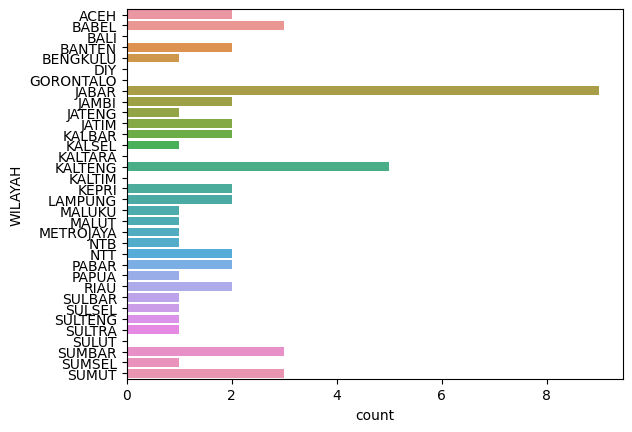

In [ ]:
p=sns.countplot(y='WILAYAH',data=df1[(df1['PengeluaranperBulan']=='Di atas Rp. 15 Juta')&(df1['Gangguan_Mental']>10)])

Pada grafik di atas, terlihat bahwa individu yang memiliki pengeluaran di atas Rp 15 juta dengan tingkat gangguan mental yang tinggi mayoritas berada di daerah Jawa Barat. Pada tahun 2023, UMR tertinggi di Jawa Barat sebesar Rp 5.1 juta, dimana nilai ini sangat jauh dari pengeluaran sebesar Rp 15 juta. Terdapat kemungkinan bahwa tingkat gangguan mental di Jawa Barat disebabkan oleh tidak cukupnya pendapatan seseorang untuk menutupi pengeluaran per bulannya. Kesimpulan ini dapat dianalisis lebih jauh lagi jika terdapat variabel pendapatan masing-masing individu.

**Kesimpulan:**

Dari hasil regresi diatas, terlihat bahwa semua parameter signifikan dengan tingkat signifikansi 5% sehingga beberapa informasi ini signifikan, yaitu:
*   Terdapat kecenderungan bahwa perempuan memiliki tingkat gangguan mental lebih tinggi daripada laki-laki.
*   Terdapat kecenderungan bahwa duda memiliki tingkat gangguan mental lebih tinggi.
*   Individu dengan pengeluaran lebih tinggi cenderung memiliki tingkat gangguan mental yang lebih tinggi juga.
*   Individu dengan tingkat pendidikan terakhir SMP cenderung memiliki tingkat gangguan mental lebih tinggi, sedangkan individu dengan tingkat pendidikan terakhrir S2 cenderung memiliki tingkat gangguan mental lebih rendah.
*   Semakin bertambahnya usia/lama berdinas cenderung meningkatkan tingkat gangguan mental.


Individu yang memiliki pengeluaran per bulan di atas Rp 15 juta cenderung memiliki tingkat gangguan mental lebih tinggi. Mayoritas individu dengan pengeluaran per bulan di atas Rp 15 juta dengan tingkat gangguan mental tinggi berada di Jawa Barat. Dengan UMR tertinggi di Jawa Barat sebesar Rp 5.1 juta, terdapat kemungkinan bahwa tingkat gangguan mental individu disebabkan oleh tidak cukupnya pendapatan untuk menutupi pengeluaran per bulan.

#INSIGHT 2

In [ ]:
df1 = data1.copy()

####Clustering Treatment Mental Health menggunakan K-Modes

#####Data Inspection

In [ ]:
df1.rename(columns = {'Sering menderita sakit kepala ?':'Q1', 'Tidak nafsu makan ?':'Q2', 'Sulit tidur ?':'Q3',
                      'Mudah takut ?':'Q4', 'Merasa tegang, cemas atau kuatir ?':'Q5', 'Tangan anda gemetar ?':'Q6',
                      'Pencernaan anda terganggu / buruk ?':'Q7', 'Sulit untuk berpikir jernih ?':'Q8', 'Merasa tidak bahagia ?':'Q9',
                      'Menangis lebih sering ?':'Q10', 'Merasa sulit untuk menikmati kegiatan sehari – hari?':'Q11', 'Sulit untuk mengambil keputusan ?':'Q12',
                      'Pekerjaan anda sehari – hari terganggu ?':'Q13', 'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?':'Q14', 'Kehilangan minat pada berbagai hal ?':'Q15',
                      'Tidak merasa berharga?':'Q16', 'Mempunyai pikiran untuk mengakhiri hidup?':'Q17', 'Merasa lelah sepanjang waktu?':'Q18',
                      'Mengalami rasa tidak enak di perut?':'Q19', 'Mudah lelah ?':'Q20'}, inplace = True)

In [ ]:
df2 = df1[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20']]

#####Model Building

In [ ]:
df3 = df2.copy()

#####Data Preparation

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2 = df2.apply(le.fit_transform)
df2.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


#####Using K-Mode with "Cao" initialization

In [ ]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8903, cost: 344148.0
Run 1, iteration: 2/100, moves: 7534, cost: 344148.0


In [ ]:
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df2.columns

In [ ]:
clusterCentroidsDf

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,1,1,1,0,0,0
2,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0


#####Combining the predicted clusters with the original DF.

In [ ]:
df2 = df3.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['Need Treatments']
combinedDf = pd.concat([df2, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
combinedDf.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Need Treatments
0,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,0
1,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,0
2,Kadang - kadang,Tidak,Tidak,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,0
3,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,0
4,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,0


#####Cluster Identification

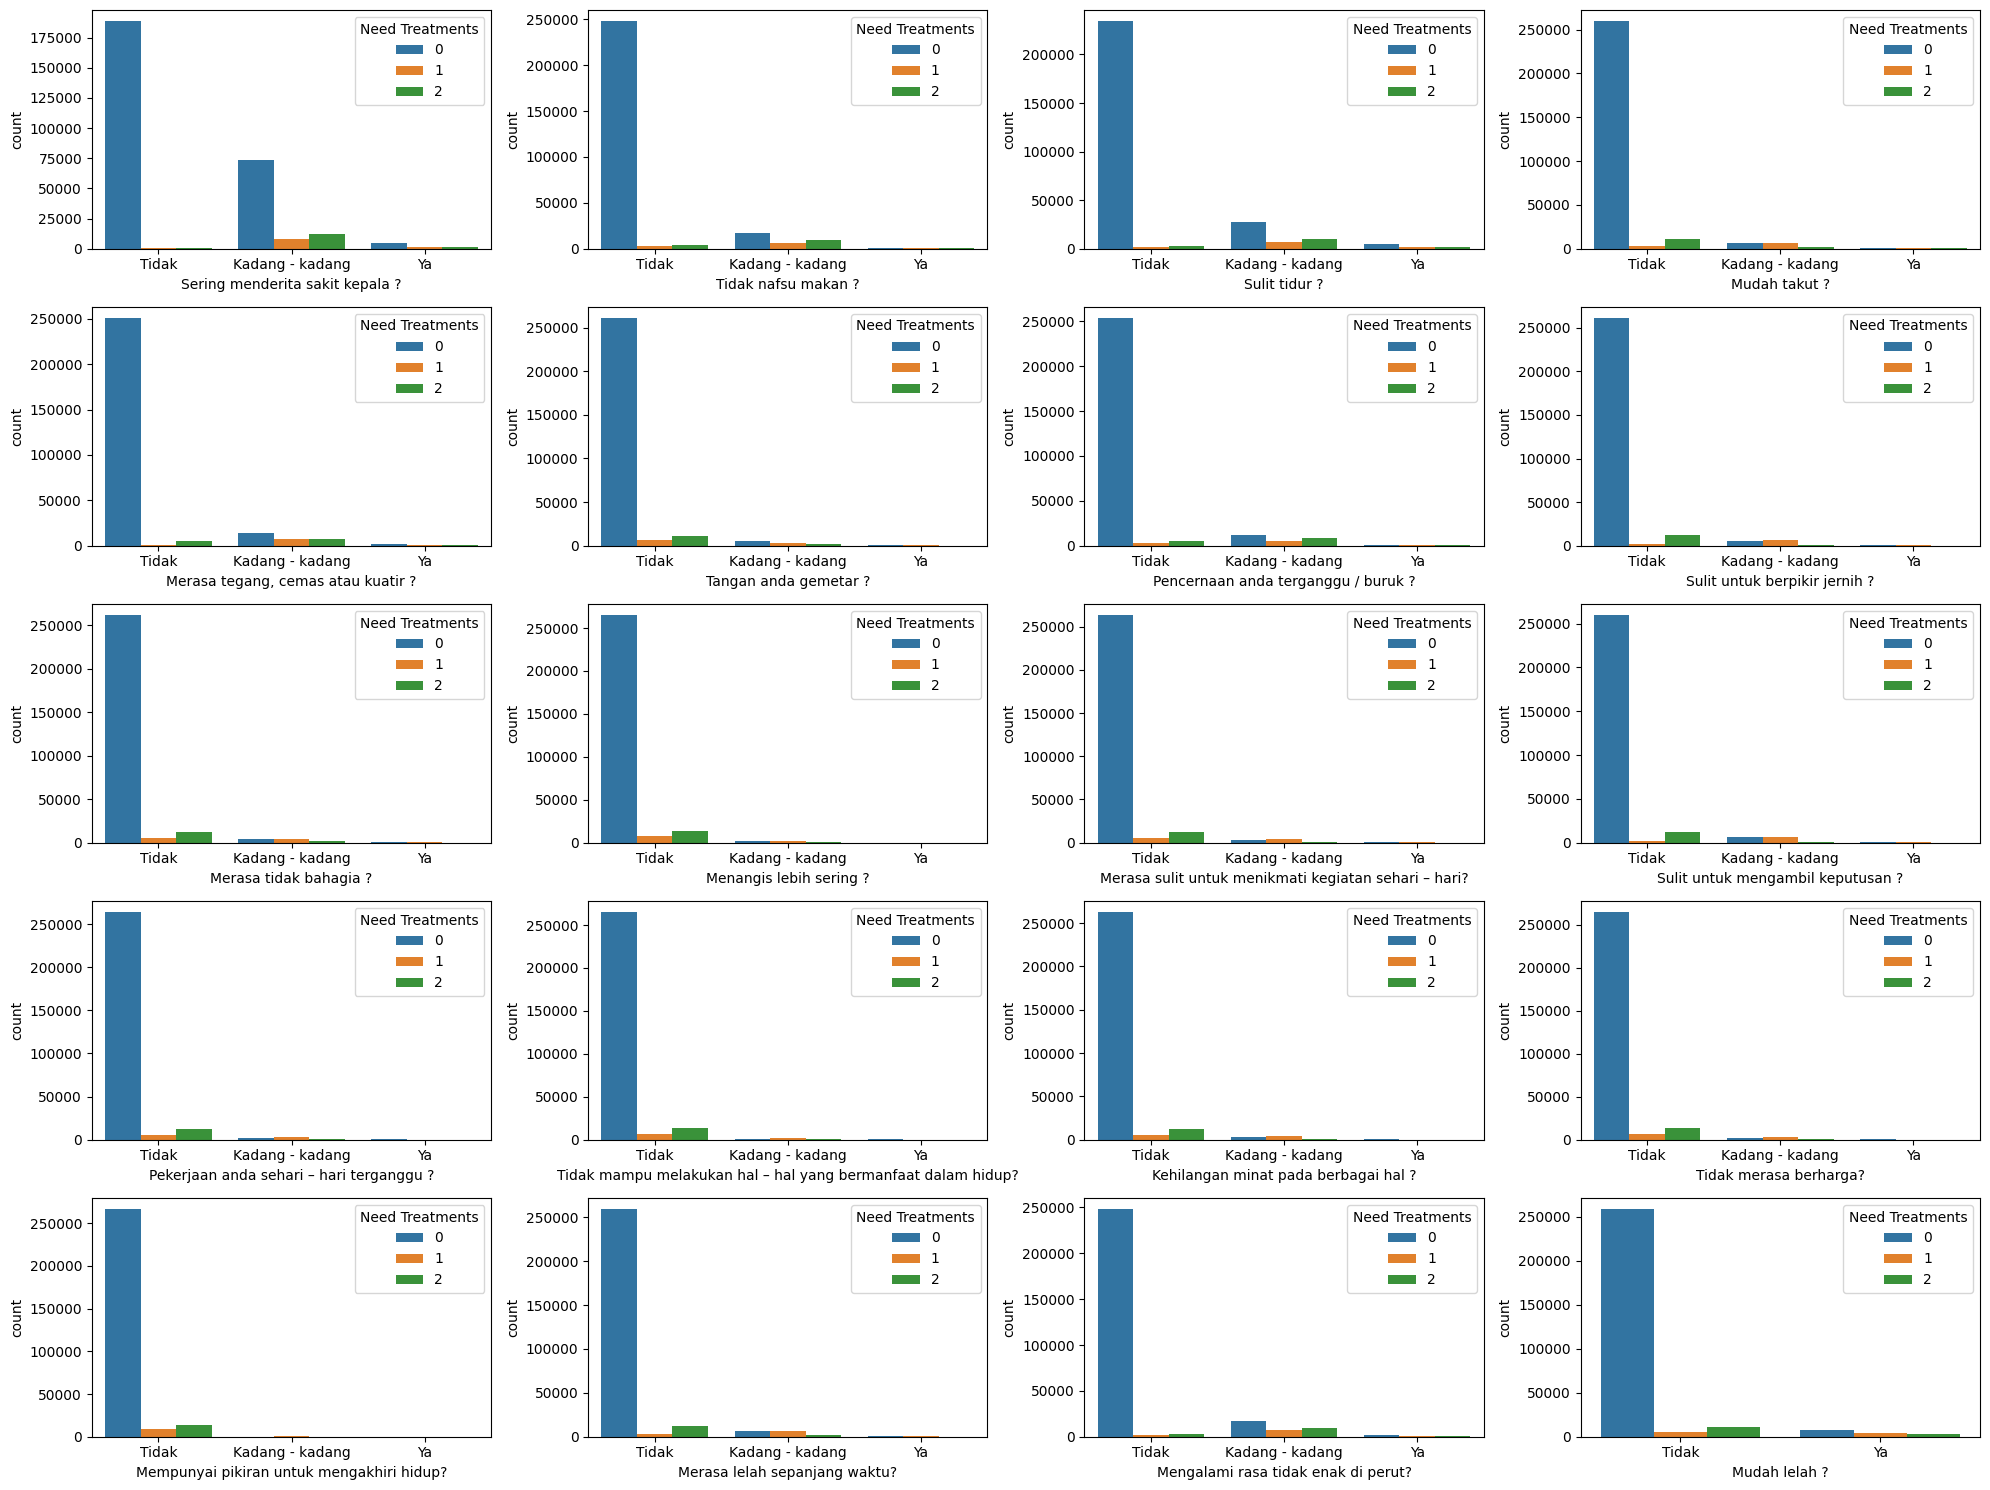

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(5, 4, figsize=(20, 15))

# Flatten the axs array to make it easier to iterate
axs_flat = axs.flatten()

# List of columns you want to create countplots for
columns_to_plot = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20']
title = ['Sering menderita sakit kepala ?', 'Tidak nafsu makan ?', 'Sulit tidur ?', 'Mudah takut ?', 'Merasa tegang, cemas atau kuatir ?',
         'Tangan anda gemetar ?','Pencernaan anda terganggu / buruk ?', 'Sulit untuk berpikir jernih ?', 'Merasa tidak bahagia ?',
         'Menangis lebih sering ?', 'Merasa sulit untuk menikmati kegiatan sehari – hari?', 'Sulit untuk mengambil keputusan ?',
         'Pekerjaan anda sehari – hari terganggu ?', 'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?',
         'Kehilangan minat pada berbagai hal ?', 'Tidak merasa berharga?', 'Mempunyai pikiran untuk mengakhiri hidup?',
         'Merasa lelah sepanjang waktu?', 'Mengalami rasa tidak enak di perut?', 'Mudah lelah ?']

# Iterate through columns and create countplots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=combinedDf[column], order=combinedDf[column].value_counts().index, hue=combinedDf['Need Treatments'], ax=axs_flat[i])
    axs_flat[i].set_xlabel(title[i])

# Remove empty subplots (if any)
for i in range(len(columns_to_plot), len(axs_flat)):
    fig.delaxes(axs_flat[i])

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

Berdasarkan hasil visualisasi di atas dapat membantu kita untuk mengidentifikasi cluster seseorang membutuhkan treatments mental heath atau tidak. Berdasarkan hasil visualisasi dapat dilihat bahwa orang yang menjawab "Tidak" pada pertanyaan-pertanyaan indikasi mental health di atas banyak yang masuk ke cluster 0. Hal ini mengindikasikan bahwa **cluster 0** merupakan **cluster yang tidak membutuhkan treatments** mental health. **cluster 2** merupakan cluster yang **mungkin membutuhkan atau dianjurkan melakukan treatment**. **cluster 1** **harus melakukan treatment mental health**

In [ ]:
combinedDf['Need Treatments'].replace({0: 'Tidak', 1: 'Ya', 2:'dianjurkan'}, inplace=True)

In [ ]:
treatment = pd.DataFrame(combinedDf['Need Treatments'])

In [ ]:
df4 = pd.concat([data1,treatment],axis=1)

In [ ]:
df5 = df4[df4['Need Treatments'] == 'Ya']

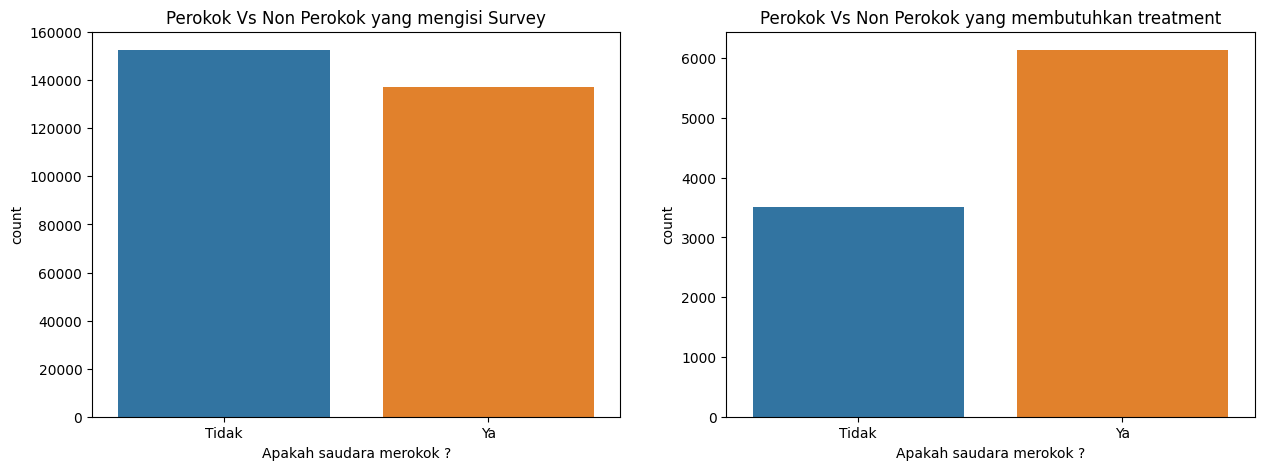

In [ ]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=df4['Apakah saudara merokok ?'],ax=axs[0])
axs[0].set_title('Perokok Vs Non Perokok yang mengisi Survey')
sns.countplot(x=df5['Apakah saudara merokok ?'],ax=axs[1])
axs[1].set_title('Perokok Vs Non Perokok yang membutuhkan treatment')
plt.show()

Dari hasil visualisasi yang di kiri dapat dilihat bahwa orang yang mengisi Survey banyak yang bukan perokok dan jumlah antara perokok dan tidak perokok hampir seimbang. Sedangkan visualisasi yang di sebelah kanan berdasarkan data yang membutuhkan treatment ternyata orang yang membutuhkan treatment banyak yang merupakan perokok dari pada Non Perokok. Hal ini mengidentifikasikan bahwa **orang-orang yang membutuhkan treatment mental health cenderung merokok**. Hal ini dapat disebabkan karena **nikotin pada rokok dapat memberikan rasa tenang atau relaksasi sementara**. **Terapi dan dukungan yang tepat, termasuk berhenti merokok, dapat menjadi bagian penting dari perawatan untuk meningkatkan kesehatan mental.**

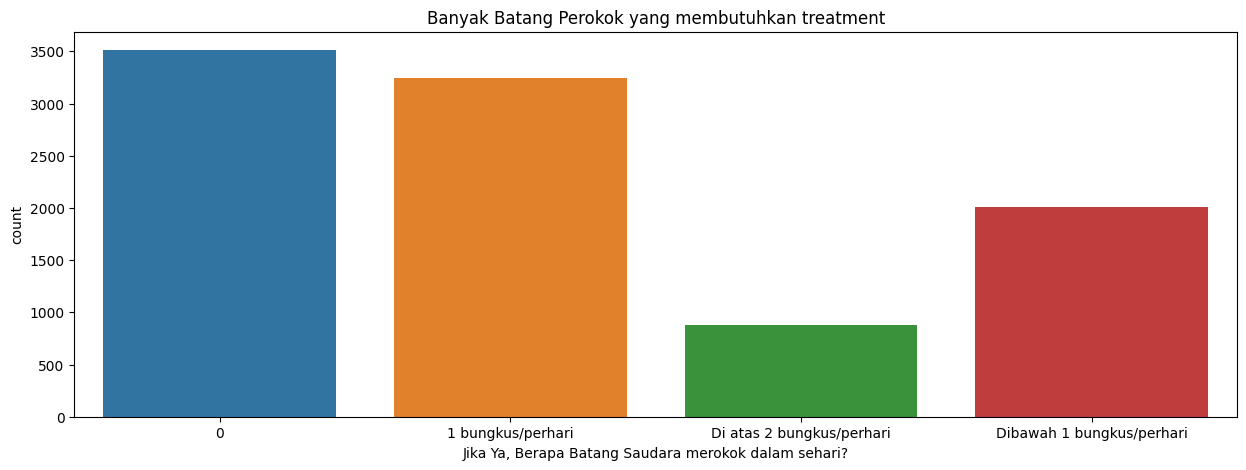

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df5['Jika Ya, Berapa Batang Saudara merokok dalam sehari?'])
plt.title('Banyak Batang Perokok yang membutuhkan treatment')
plt.show()

Dari hasil visualisasi di atas, dapat dilihat bahwa sebagian besar perokok yang membutuhkan treatment mengkonsumsi 1 bungkus/perhari. Berdasarkan Klasifikasi perokok menurut WHO dibagi menjadi 4 kategori, yaitu: 1. Perokok ringan (1 - 10 batang) 2. Perokok sedang (11 - 20 batang) 3. Perokok berat (21 – 30 batang) 4. Perokok sangat berat (lebih dari 31 batang). 1 Bungkus rokok setara dengan 10 sampai 12 batang. Hal ini menandakan **sebagian besar perokok yang membutuhkan treatment merupakan perokok sedang**. Hal ini terjadi diindikasi bahwa **rokok hanya digunakan untuk memberikan rasa tenang atau relaksasi** sehingga mereka tidak mengonsumsi jumlah rokok yang tinggi setiap hari.

In [ ]:
df2.replace({'Ya': 2, 'Tidak': 0, 'Kadang - kadang': 1}, inplace=True)

In [ ]:
df2['Score'] = (df2['Q1'] + df2['Q2'] + df2['Q3'] + df2['Q4'] + df2['Q5'] + df2['Q6'] + df2['Q7'] + df2['Q8'] + df2['Q9'] + df2['Q10'] + df2['Q11'] +
                df2['Q12'] + df2['Q13'] + df2['Q14'] + df2['Q15'] + df2['Q16'] + df2['Q17'] + df2['Q18'] + df2['Q19'] + df2['Q20'])

In [ ]:
df6 = pd.concat([df2,treatment],axis=1)

In [ ]:
df7 = df6[df6['Need Treatments']=='Ya']

In [ ]:
df7['Score'].describe()

count    9649.000000
mean       12.428749
std         4.895776
min         6.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        39.000000
Name: Score, dtype: float64

Pertama kita akan mencari score mental health berdasarkan pertanyaan-pertanyaan indikasi terkena penyakit mental health. Setelah kita dapat score mental health tersebut, kita dapat melihat score orang-orang yang harus melakukan treatment mental health berdasarkan clustering sebelumnya. Jika dilihat dari hasil di atas, **orang yang harus melakukan treatment** untuk kesehatan mental adalah **orang yang memiliki score di antara 6 sampai 39 dengan rata-rata score 12.43**

#INSIGHT 3

Membuat kolom 'Laki-laki' dimana berisi nilai Laki-laki = 1, Perempuan = 0

In [ ]:
df1 = data1.copy()

In [ ]:
dict1 = {'Tidak':0, 'Kadang - kadang':1, 'Ya':2}
dict2 = {'Tidak':0, 'Ya':1}
for i in df1.columns[30:49]:
  df1[i] = df1[i].replace(dict1)
df1['Mudah lelah ?'] = df1['Mudah lelah ?'].replace(dict2)

In [ ]:
df1['Gangguan Mental'] = df1[df1.columns[30:50].tolist()].sum(axis=1)

In [ ]:
df1 = df1.rename(columns={'JENIS KELAMIN':'Jenis_Kelamin','Status Perkawinan':'Status_Perkawinan','Gangguan Mental':'Gangguan_Mental','PENGELUARAN/BULAN':'PengeluaranperBulan','PENDIDIKAN TERAKHIR':'Pendidikan_Terakhir','LAMA BERDINAS':'Lama_Berdinas'})

In [ ]:
dict4 = {'LAKI - LAKI':1, 'PEREMPUAN':0}
df1['Laki-laki'] = df1['Jenis_Kelamin'].replace(dict4)

Membuat kolom Nilai IMT Baru dan kolom IMT baru karena sebelumnya telah dilakukan perbaikan pada kolom Tinggi Badan dan Berat Badan. Kolom IMT Baru akan diisi sesuai dengan Pedoman Gizi Seimbang Kementerian Kesehatan RI, yaitu

*   Sangat kurus: < 17
*   Kurus: 17 - < 18.5
*   Normal: 18.5 - 25
*   Gemuk: > 25 - 27
*   Obesitas: > 27

In [ ]:
df1['Nilai IMT Baru'] = df1['BERAT BADAN'] / ((df1['TINGGI BADAN']/100)**2)

In [ ]:
df1['IMT Baru'] = df1['IMT'].copy()

In [ ]:
for i in range(len(df1['Nilai IMT Baru'])):
  if df1['Nilai IMT Baru'][i] < 17:
    df1['IMT Baru'][i] = 'Sangat Kurus'
  elif 17 < df1['Nilai IMT Baru'][i] < 18.5:
    df1['IMT Baru'][i] = 'Kurus'
  elif 18.5 < df1['Nilai IMT Baru'][i] < 25:
    df1['IMT Baru'][i] = 'Normal'
  elif 25 < df1['Nilai IMT Baru'][i] < 27:
    df1['IMT Baru'][i] = 'Gemuk'
  elif df1['Nilai IMT Baru'][i] > 27:
    df1['IMT Baru'][i] = 'Obesitas'

<ipython-input-148-83f99dae60d2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IMT Baru'][i] = 'Obesitas'
<ipython-input-148-83f99dae60d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IMT Baru'][i] = 'Normal'
<ipython-input-148-83f99dae60d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IMT Baru'][i] = 'Gemuk'
<ipython-input-148-83f99dae60d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
df1.drop(['NILAI IMT','IMT'], axis=1, inplace=True)

Membuat Kolom Obesitas, dimana individu dengan IMT Obesitas akan memiliki nilai 1, dan 0 untuk IMT lainnya.

In [ ]:
dict3 = {'Obesitas':1, 'Normal':0, 'Gemuk':0, 'Sangat Kurus':0, 'Kurus':0}
df1['Obesitas'] = df1['IMT Baru'].replace(dict3)

### Klasifikasi

Stres eating merupakan kecenderungan seseorang untuk mengalihkan rasa cemas, sedih, atau marah dengan makan berlebih. Dibuat hipotesis bahwa tingkat gangguan mental merupakan penyebab individu mengalami obesitas.

Membuat model klasifikasi dengan Random Forest, dimana variabel responnya adalah 'Obesitas', dengan variabel penjelas, yaitu jenis kelamin, usia, gangguan mental.

In [ ]:
df1A = df1[['USIA','Gangguan_Mental','Laki-laki']]
y1 = df1['Obesitas']

In [ ]:
from sklearn.model_selection import train_test_split
seed = 99

df1A_train, df1A_test, y_train, y_test = train_test_split(df1A, y1, test_size = 0.3, random_state = seed)

In [ ]:
# random forest
rf = RandomForestClassifier()
rf.fit(df1A_train, y_train)
y_rf1 = rf.predict(df1A_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(rf, df1A, y1, cv=10)

Accuracy Random Forest: 0.71 (+/- 0.00)


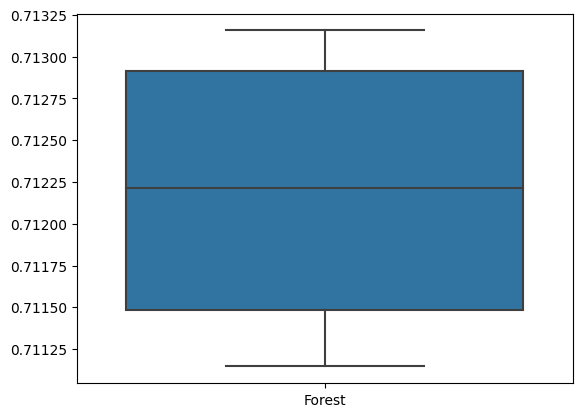

In [ ]:
df_ = pd.DataFrame({"Forest": scores_rf})
p = sns.boxplot(data = df_)
print("Accuracy Random Forest: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

Dengan menggunakan model Random Forest, diperoleh model klasifikasi 'Obesitas' dengan akurasi sekitar 71%.

Feature ranking:
1. feature 0 (0.806373)
2. feature 1 (0.175702)
3. feature 2 (0.017925)


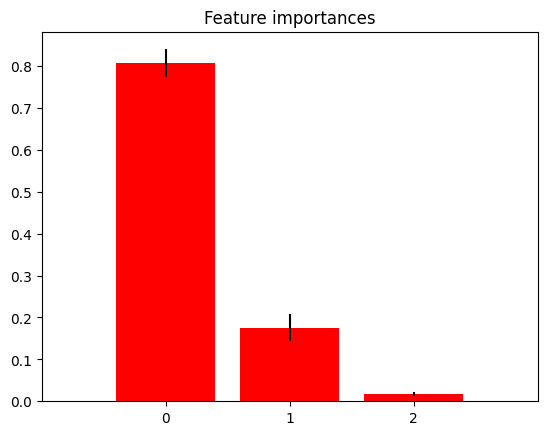

In [ ]:
# Variable importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(df1A.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df1A.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(df1A.shape[1]), indices)
plt.xlim([-1, df1A.shape[1]])
plt.show()

**Kesimpulan:**

Variabel USIA merupakan variabel yang paling penting dalam model klasifikasi yang diperoleh, yaitu sebesar 80%. Sedangkan, variabel Gangguan Mental berperan sebesar 17%. Hal ini mengindikasikan bahwa variabel USIA berperan lebih penting dari variabel Gangguan Mental dalam pengklasifikasian 'Obesitas'. Dari grafik dibawah, terlihat bahwa individu yang mengalami obesitas paling banyak berusia di rentang 35 - 44 tahun.

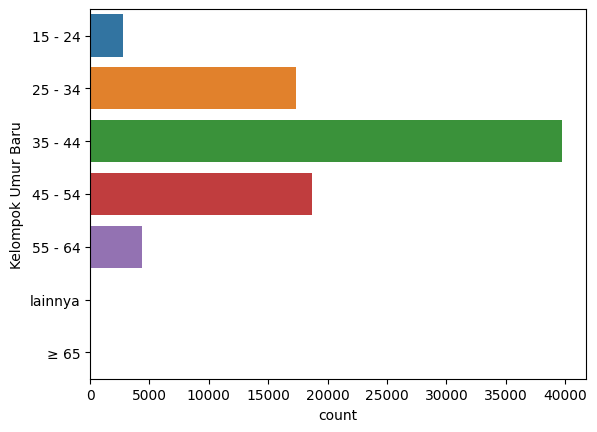

In [ ]:
p=sns.countplot(y='Kelompok Umur Baru',data=df1[df1['Obesitas']==1])

#INSIGHT 4

Membuat model klasifikasi 'Penyakit Jantung' dengan variabel prediktor yaitu jenis kelamin, usia, hipertensi, obesitas, diabetes, konsumsi alkohol, aktivitas fisik, dan junk food.

### Preprocessing

In [ ]:
df2 = df1[['Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?','Obesitas','Jenis_Kelamin','USIA','Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?','Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?','Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?','Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?','Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari']]

In [ ]:
dum1_ = pd.get_dummies(df2['Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?'], prefix='jantung')
dum2_ = pd.get_dummies(df2['Obesitas'], prefix='ob')
dum3_ = pd.get_dummies(df2['Jenis_Kelamin'], prefix='jk')
dum4_ = pd.get_dummies(df2['Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?'], prefix='hp')
dum5_ = pd.get_dummies(df2['Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?'], prefix='dm')
dum6_ = pd.get_dummies(df2['Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?'], prefix='aktiv')
dum7_ = pd.get_dummies(df2['Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?'], prefix='alk')
dum8_ = pd.get_dummies(df2['Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari'], prefix='jnkfood')
df2 = pd.concat([dum1_,df2['USIA'],dum2_,dum3_,dum4_,dum5_,dum6_,dum7_,dum8_], axis = 1)

##### Klasifikasi

In [ ]:
df2A = df2[df2.columns[2:]]
y2 = df2['jantung_Ya']

In [ ]:
seed=99
df2A_train, df2A_test, y2_train, y2_test = train_test_split(df2A, y2, test_size = 0.3, random_state = seed)

In [ ]:
rf2 = RandomForestClassifier()
rf2.fit(df2A_train, y2_train)
y_rf2 = rf2.predict(df2A_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_rf2 = cross_val_score(rf2, df2A, y2, cv=10)

Accuracy Random Forest: 0.99 (+/- 0.00)


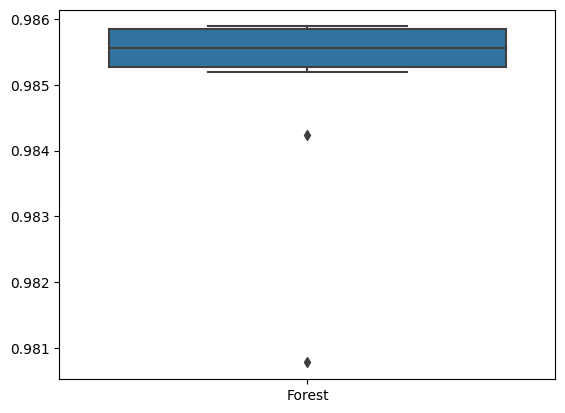

In [ ]:
df2_ = pd.DataFrame({"Forest": scores_rf2})
p = sns.boxplot(data = df2_)
print("Accuracy Random Forest: %0.2f (+/- %0.2f)" % (scores_rf2.mean(), scores_rf2.std() * 2))

Feature ranking:
1. feature 0 (0.587041)
2. feature 6 (0.091659)
3. feature 5 (0.081514)
4. feature 7 (0.038069)
5. feature 8 (0.031758)
6. feature 11 (0.017155)
7. feature 15 (0.017072)
8. feature 17 (0.017036)
9. feature 10 (0.015717)
10. feature 9 (0.014158)
11. feature 16 (0.013912)
12. feature 2 (0.012831)
13. feature 1 (0.012112)
14. feature 13 (0.011298)
15. feature 4 (0.010166)
16. feature 12 (0.010091)
17. feature 3 (0.009947)
18. feature 14 (0.008465)


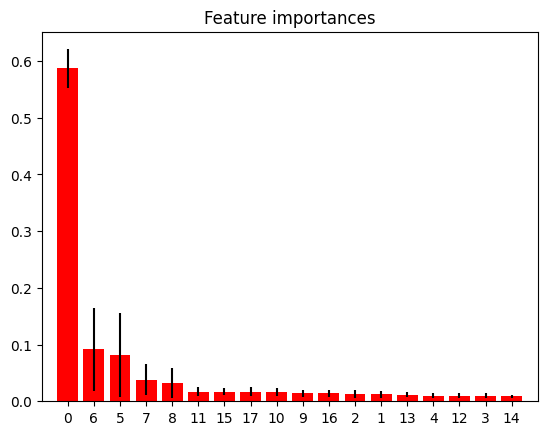

In [ ]:
# Variable importance
importances = rf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(df2A.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df2A.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(df2A.shape[1]), indices)
plt.xlim([-1, df2A.shape[1]])
plt.show()

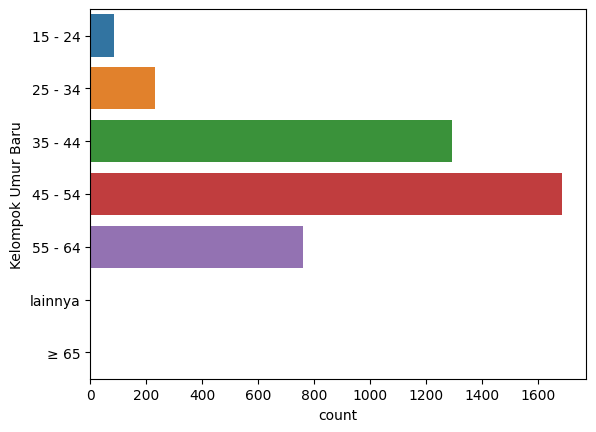

In [ ]:
p=sns.countplot(y='Kelompok Umur Baru',data=df1[df1['Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?']=='Ya'])

**Kesimpulan:**

Variabel USIA merupakan variabel yang paling penting dalam model klasifikasi penyakit jantung, yaitu sebesar 58%, dimana pada grafik kedua terlihat bahwa mayoritas individu yang memiliki penyakit jantung berusia di rentang 45 - 54 tahun. Di sisi lain, penyakit hipertensi dan diabetes melitus juga berperan dalam model sebesar masing-masing 8% dan 3%.

Mengenai kegiatan individu, berikut peran beberapa variabel dalam pengklasifikasian penyakit jantung:
*   Variabel tidak pernah melakukan aktivitas fisik berperan sekitar 1.7%
*   Variabel junkfood 1-2 kali/sehari berperan sekitar 1.6%

Dari informasi tersebut, ciri individu yang terkena penyakit jantung adalah individu yang tidak pernah melakukan aktivitas fisik, mengonsumsi junkfood 1-2 kali/sehari, memiliki riwayat hipertensi dan diabetes melitus.

Oleh karena itu, untuk mengurangi risiko terkena penyakit jantung, seorang individu perlu untuk mengurangi konsumsi junkfood, lebih banyak melakukan aktivitas fisik/berolahraga, dan menjaga konsumsi gula dengan tujuan mengurangi risiko penyakit diabetes melitus.




#INSIGHT 5

Karies gigi adalah kondisi di mana lapisan keras di luar gigi (email) terkikis oleh bakteri yang memproduksi asam. Hal ini dapat menyebabkan lubang kecil pada gigi dan dapat merusak jaringan gigi yang lebih dalam apabila tidak segera ditangani.

Karies disebabkan oleh beberapa faktor, diantara lain yaitu rokok, alkohol, makanan manis, dan kebiasaan menjaga kebersihan mulut.

In [ ]:
df1 = data1.copy()

In [ ]:
df1.new = df1.iloc[:, list(range(0, 3)) + list(range(50, 52)) + list(range(57, 64)) +list(range(75, 78)) ]

<ipython-input-168-e209070006c2>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.new = df1.iloc[:, list(range(0, 3)) + list(range(50, 52)) + list(range(57, 64)) +list(range(75, 78)) ]


In [ ]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

df1.new['KARIES'] = df1.new ['Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)']
df1.new['KARIES'].replace(['Tidak', 'Ya'],[0, 1], inplace=True)
df1.new['KARIES']=pd.to_numeric(df1.new['KARIES'])
print(df1.new['KARIES'])

0         0
1         0
2         0
3         0
4         0
         ..
289796    0
289797    1
289798    0
289799    1
289800    0
Name: KARIES, Length: 289801, dtype: int64


<ipython-input-169-6eb49b19e834>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.new['KARIES'] = df1.new ['Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)']
<ipython-input-169-6eb49b19e834>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.new['KARIES'].replace(['Tidak', 'Ya'],[0, 1], inplace=True)
<ipython-input-169-6eb49b19e834>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
df1.new['jlh_gigi_rusak'] = df1.new['Jika Ya berapa jumlah gigi saudara yang Karies']
df1.new['merokok'] = df1.new['Apakah saudara merokok ?']
df1.new['jlh_rokok'] = df1.new['Jika Ya, Berapa Batang Saudara merokok dalam sehari?']
df1.new['konsumsi_gula'] = df1.new['Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?']
df1.new['jlh_alkohol'] = df1.new['Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?']
df1.new['jlh_gosok_gigi'] = df1.new['Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?']
df1.new['lama_gosok_gigi'] = df1.new['Berapa lama saudara menggosok gigi ?']
df1.new['Umur'] = df1.new['Kelompok Umur Baru']
df1.new['JK'] = df1.new['JENIS KELAMIN']

<ipython-input-170-a55745a7e1aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.new['jlh_gigi_rusak'] = df1.new['Jika Ya berapa jumlah gigi saudara yang Karies']
<ipython-input-170-a55745a7e1aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.new['merokok'] = df1.new['Apakah saudara merokok ?']
<ipython-input-170-a55745a7e1aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
model= ols('KARIES ~ USIA + JK + C(merokok) + C(konsumsi_gula) +  C(jlh_alkohol)  + C(jlh_gosok_gigi)+ C(lama_gosok_gigi)', data=df1.new).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 KARIES   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1862.
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:29:10   Log-Likelihood:            -1.4870e+05
No. Observations:              289801   AIC:                         2.974e+05
Df Residuals:                  289788   BIC:                         2.976e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       0.0184      0.005      3.618      0.000       0.008       0.028
JK[T.PEREMPUAN]                                 0.0307      0.003     10.449      0.000       0.025       0.036
C(merokok)[T.Ya]                                0.1014      0.002     64.040      0.000       0.098       0.105
C(konsumsi_gula)[T.Lebih dari 6 sendok teh]     0.1050      0.004     26.670      0.000       0.097       0.113
C(konsumsi_gula)[T.Tidak pernah]               -0.0435      0.002    -17.782      0.000      -0.048      -0.039
C(jlh_alkohol)[T.Tidak pernah]                 -0.0674      0.004    -18.068      0.000      -0.075      -0.060
C(jlh_alkohol)[T.lebih dari 25ml]              -0.0358      0.014     -2.587      0.010      -0.063      -0.009
C(jlh_gosok_gigi)[T.2 Kali]                    -0.1251      0.005    -25.211      0.000      -0.135      -0.115
C(jlh_gosok_gigi)[T.> 2 Kali]                  -0.1690      0.005    -33.320      0.000      -0.179      -0.159
C(jlh_gosok_gigi)[T.Tidak pernah]              -0.1742      0.008    -20.996      0.000      -0.190      -0.158
C(lama_gosok_gigi)[T.1 - 2 menit]               0.0622      0.003     20.400      0.000       0.056       0.068
C(lama_gosok_gigi)[T.Di atas 3 menit]           0.0367      0.003     11.227      0.000       0.030       0.043
C(lama_gosok_gigi)[T.Di bawah 1 menit]          0.0938      0.003     27.078      0.000       0.087       0.101
USIA                                            0.0081    7.7e-05    105.688      0.000       0.008       0.008
==============================================================================
Omnibus:                    43278.644   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63927.887
Skew:                           1.139   Prob(JB):                         0.00
Kurtosis:                       2.680   Cond. No.                     1.92e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Dari hasil regresi diatas, terlihat bahwa semua parameter signifikan dengan tingkat signifikansi 10% sehingga beberapa informasi ini signifikan, yaitu:
*   Terdapat kecenderungan bahwa perempuan memiliki tingkat penyakit karies lebih tinggi daripada laki-laki.
* Individu yang perokok memiliki tingkat penyakit karies yang lebih tinggi dibandingkan tidak merokok.
*  Konsumsi gula sangat berpengaruh terhadap risiko penyakit karies. Pada data diperoleh bahwa tingkat penyakit karies lebih tinggi pada individu yang mengonsmusi gula > 6 sendok teh.
*  Konsumsi alkohol berpengaruh terhadap risiko penyakit karies. Pada data diperoleh bahwa tingkat penyakit karies lebih tinggi pada individu yang mengonsumsi alkohol > 25 ml.
*   Semakin banyak sikat gigi sehari tidak menjamin turun nya risiko terkena karies. Pada data diperoleh bahwa tingkat penyakit karies terjadi hampir sama pada setiap kategori jumlah gosok gigi. Jumlah gosok gigi tidak terlalu berpengaruh secara signifikan terhadap terjadinya penyakit karies.
*   Semakin lama menggosok gigi menjamin turun nya risiko terkena karies. Pada data diperoleh bahwa individu yang menggosok gigi diatas 3 menit memiliki tingkat penyakit karies yang lebih rendah.
* Semakin bertambahnya usia cenderung meningkatkan tingkat terjadinya penyakit karies.

In [ ]:
kolom_gigi_rusak = 'jlh_gigi_rusak'

# Membuat mapping untuk penggantian nilai
mapping = {
    '0': 0,
    '1 - 3 gigi karies/berlubang': 3,
    '4 - 5 gigi karies/berlubang': 5,
    '> 6 gigi karies/berlubang': 7
}

# Mengganti nilai dalam kolom_gigi_rusak berdasarkan mapping
df1.new[kolom_gigi_rusak] = df1.new[kolom_gigi_rusak].replace(mapping)

# Menampilkan hasil setelah penggantian nilai
print(df1.new[kolom_gigi_rusak].head())

0    0
1    0
2    0
3    0
4    0
Name: jlh_gigi_rusak, dtype: category
Categories (4, int64): [0, 3, 5, 7]


<ipython-input-173-0c7c57cc48c1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.new[kolom_gigi_rusak] = df1.new[kolom_gigi_rusak].replace(mapping)


<ipython-input-174-1ad11eadcdbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.new[kolom_kelompok_umur] = df1.new[kolom_kelompok_umur].astype('category')


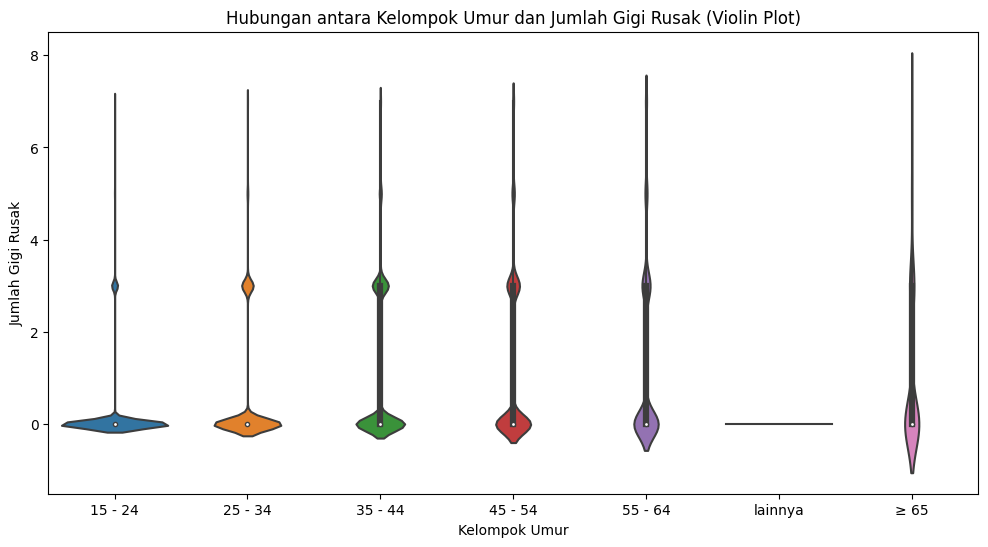

In [ ]:
import matplotlib.pyplot as plt

# Menentukan kolom yang diperlukan
kolom_kelompok_umur = 'Kelompok Umur Baru'

# Konversi tipe data kolom kelompok umur menjadi kategori jika belum
df1.new[kolom_kelompok_umur] = df1.new[kolom_kelompok_umur].astype('category')

# Filter data yang memiliki informasi jumlah gigi rusak
data_gigi_rusak = df1.new[df1.new[kolom_gigi_rusak].notnull()]

# Mengubah kolom_gigi_rusak menjadi numerik
data_gigi_rusak[kolom_gigi_rusak] = pd.to_numeric(data_gigi_rusak[kolom_gigi_rusak], errors='coerce')

# Plot hubungan antara kelompok umur dan jumlah gigi rusak
plt.figure(figsize=(12, 6))
sns.violinplot(x=kolom_kelompok_umur, y=kolom_gigi_rusak, data=data_gigi_rusak)
plt.title('Hubungan antara Kelompok Umur dan Jumlah Gigi Rusak (Violin Plot)')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Gigi Rusak')
plt.show()

#INSIGHT 6

In [ ]:
data2 = data1.copy()

In [ ]:
data2['A1']= data2['Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?']
data2['A2'] = data2 ['Berapa lama saudara mandi ?']
data2['A3']= data2['Dalam sehari, berapa kali Saudara mengganti pakaian dalam?']

In [ ]:
data2['Mikosis'] = data2['Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?']
data2['Mikosis'].replace([ 'Ya', 'Tidak'], [0, 1], inplace=True)
data2['Mikosis'] = pd.to_numeric(data2['Mikosis'])
print(data2['Mikosis'])

0         1
1         1
2         1
3         1
4         1
         ..
289796    1
289797    1
289798    1
289799    1
289800    1
Name: Mikosis, Length: 289801, dtype: int64


In [ ]:
model = ols ('Mikosis ~ C(A1) + C(A2) + C(A3) ', data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mikosis   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     44.19
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.75e-71
Time:                        10:29:32   Log-Likelihood:             2.0352e+05
No. Observations:              289801   AIC:                        -4.070e+05
Df Residuals:                  289792   BIC:                        -4.069e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.9581      0.002    422.788      0.000       0.954       0.963
C(A1)[T.2 Kali]                  0.0210      0.002      9.241      0.000       0.017       0.025
C(A1)[T.> 2 Kali]                0.0227      0.002      9.770      0.000       0.018       0.027
C(A1)[T.Tidak pernah]            0.0133      0.008      1.768      0.077      -0.001       0.028
C(A2)[T.> 5 menit]              -0.0010      0.000     -2.175      0.030      -0.002   -9.92e-05
C(A2)[T.Kurang dari 2 menit]    -0.0009      0.002     -0.570      0.569      -0.004       0.002
C(A3)[T.2 Kali]                  0.0065      0.001      9.469      0.000       0.005       0.008
C(A3)[T.> 2 Kali]                0.0100      0.001     12.091      0.000       0.008       0.012
C(A3)[T.Tidak pernah]           -0.0191      0.005     -3.604      0.000      -0.029      -0.009
==============================================================================
Omnibus:                   389243.157   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51603316.803
Skew:                          -8.078   Prob(JB):                         0.00
Kurtosis:                      66.344   Cond. No.                         52.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dari hasil ols diatas, dengan taraf signifikansi 0,5 terlihat bahwa seluruh parameter signifikan. Didapatkan informasi sebagai berikut :
1. Seseorang yang mandi kurang dari 2 menit cenderung terkena mikosis daripada seseorang yang mandi lebih dari 5 menit
2. Seseorang yang tidak pernah mengganti celana dalam cenderung lebih mudah terkena penyakit misokis dibandingkan dengan yang lain
3. Seseorang yang tidak pernah mandi cenderung terkena penyakit mikosis daripada yang lainnya.

Dari hasil diatas, orang-orang yang terkena mikosis adalah orang yang cukup rajin menjaga kebersihan. Hal ini menandakan ada penyebab lain yang menyebabkan seseorang terkena penyakit tersebut.

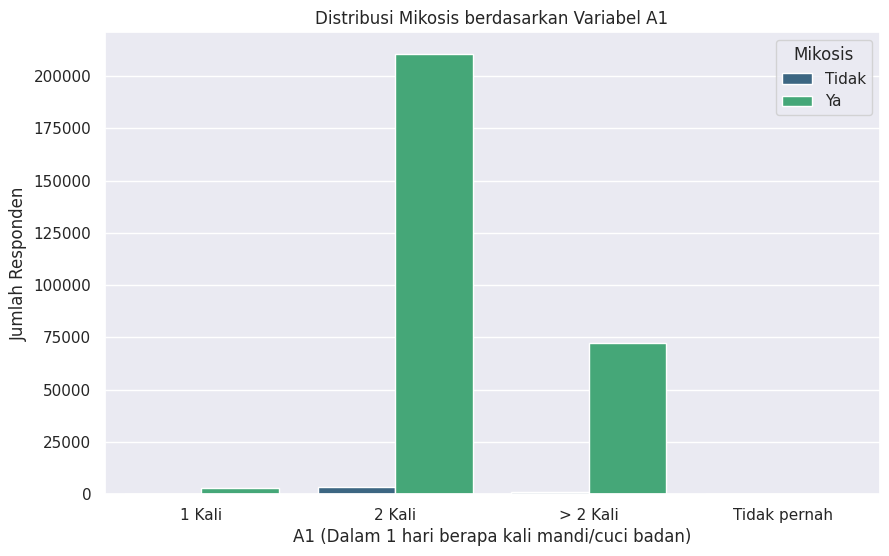

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='A1', hue='Mikosis', data=data2, palette='viridis')

plt.xlabel('A1 (Dalam 1 hari berapa kali mandi/cuci badan)')
plt.ylabel('Jumlah Responden')
plt.title('Distribusi Mikosis berdasarkan Variabel A1')
plt.legend(title='Mikosis', loc='upper right', labels=['Tidak', 'Ya'])
plt.show()

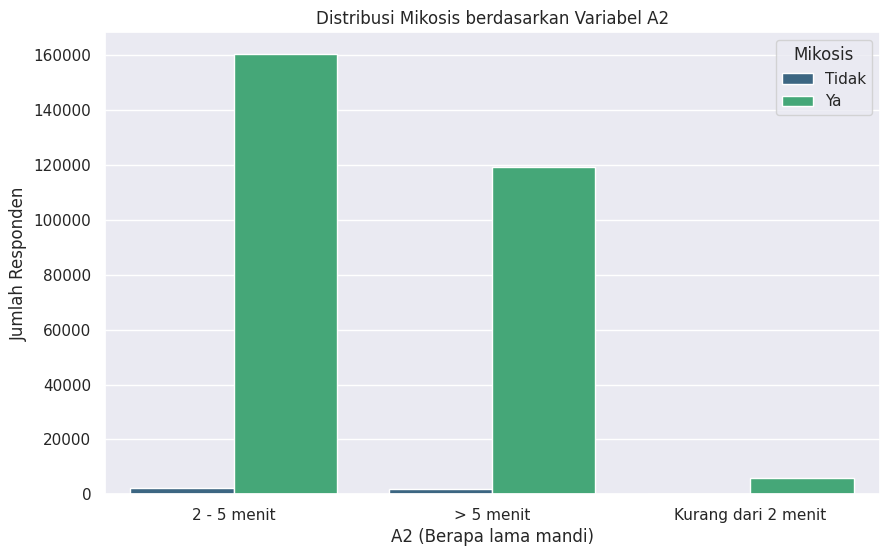

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='A2', hue='Mikosis', data=data2, palette='viridis')

plt.xlabel('A2 (Berapa lama mandi)')
plt.ylabel('Jumlah Responden')
plt.title('Distribusi Mikosis berdasarkan Variabel A2')
plt.legend(title='Mikosis', loc='upper right', labels=['Tidak', 'Ya'])
plt.show()

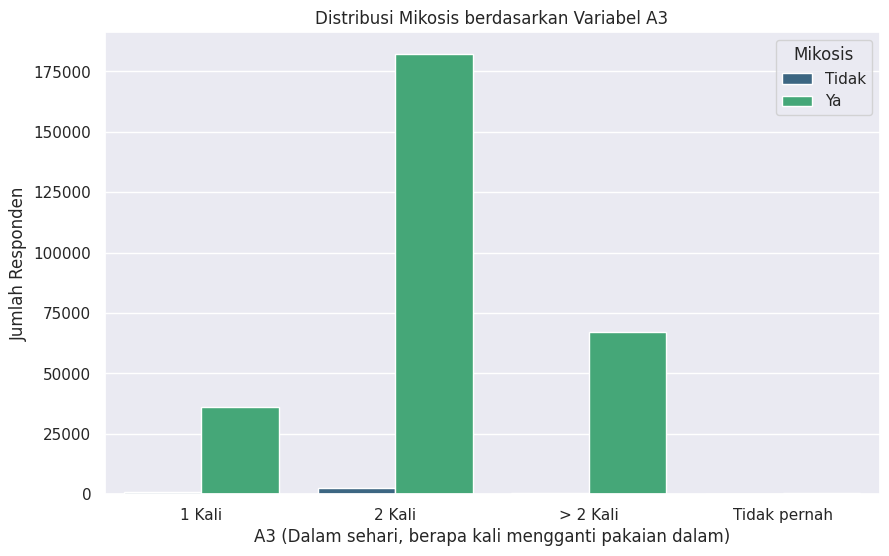

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='A3', hue='Mikosis', data=data2, palette='viridis')

plt.xlabel('A3 (Dalam sehari, berapa kali mengganti pakaian dalam)')
plt.ylabel('Jumlah Responden')
plt.title('Distribusi Mikosis berdasarkan Variabel A3')
plt.legend(title='Mikosis', loc='upper right', labels=['Tidak', 'Ya'])
plt.show()

#INSIGHT 7

In [ ]:
data2 = data1.copy()

In [ ]:
data2['Diare'] = data2['Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?']
data2['Diare'].replace(['Tidak', 'Ya'],[0, 1], inplace=True)
data2['Diare']=pd.to_numeric(data2['Diare'])
print(data2['Diare'])

0         1
1         0
2         1
3         0
4         0
         ..
289796    0
289797    0
289798    0
289799    0
289800    0
Name: Diare, Length: 289801, dtype: int64


In [ ]:
data2['Air_bersih'] = data2['Sumber air bersih di tempat tinggal saudara ?']
data2['Cuci_tangan'] = data2['Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?']
data2['Jarak_tempat_sampah'] = data2['Berapa jarak tempat sampah dengan rumah saudara ?']
data2['junkfood'] = data2['Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari']

In [ ]:
model1 = ols('Diare ~ USIA + C(Air_bersih) + C(Cuci_tangan) + C(Jarak_tempat_sampah) + C(junkfood)', data=data2).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Diare   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     164.6
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:40:42   Log-Likelihood:                -74643.
No. Observations:              289801   AIC:                         1.493e+05
Df Residuals:                  289790   BIC:                         1.494e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         0.1403      0.003     46.160      0.000       0.134       0.146
C(Air_bersih)[T.Sumur/Kali]                      -0.0070      0.001     -5.913      0.000      -0.009      -0.005
C(Air_bersih)[T.Tadah hujan]                      0.0303      0.007      4.562      0.000       0.017       0.043
C(Air_bersih)[T.Tidak ada]                       -0.0262      0.010     -2.701      0.007      -0.045      -0.007
C(Cuci_tangan)[T.Selalu]                         -0.0416      0.002    -21.429      0.000      -0.045      -0.038
C(Cuci_tangan)[T.Tidak/Jarang sekali]            -0.0288      0.010     -2.893      0.004      -0.048      -0.009
C(Jarak_tempat_sampah)[T.Lebih dari 10 meter]    -0.0042      0.001     -3.078      0.002      -0.007      -0.002
C(Jarak_tempat_sampah)[T.Tidak ada]              -0.0147      0.002     -7.782      0.000      -0.018      -0.011
C(junkfood)[T.Di atas 2 kali/hari]                0.0237      0.004      6.751      0.000       0.017       0.031
C(junkfood)[T.Tidak pernah]                      -0.0341      0.001    -27.176      0.000      -0.037      -0.032
USIA                                              0.0007   5.89e-05     11.738      0.000       0.001       0.001
==============================================================================
Omnibus:                   133900.690   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494840.699
Skew:                           2.458   Prob(JB):                         0.00
Kurtosis:                       7.100   Cond. No.                         664.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dari hasil regresi diatas, terlihat bahwa semua parameter signifikan dengan tingkat signifikansi 5% sehingga beberapa informasi ini signifikan, yaitu:


*   Sumber air bersih yang berasal dari tadah hujan cenderung lebih dapat menyebabkan terjadinya diare daripada sumber air bersih lainnya.
*   Individu yang jarang atau bahkan sama sekali tidak mencuci tangan dengan sabun sebelum makan cenderung lebih mungkin terkena diare.
*   Rumah yang di sekitarnya tidak memiliki tempat pembuangan sampah memiliki kecenderungan yang lebih rendah untuk terkena diare.
*   Indiviu yang mengonsumsi junkfood lebih dari 2 kali per hari memiliki kecenderungan yang lebih tinggi untuk terkena diare.
*   Seiring bertambahnya usia, maka dapat meningkatkan kemungkinan terkena diare.

In [ ]:
diare_location = data2.groupby(['WILAYAH', 'Diare'])
diare_loc = diare_location['Diare'].count()
print(diare_loc.to_string())

WILAYAH    Diare
ACEH       0         7850
           1           88
BABEL      0         3421
           1          660
BALI       0         7432
           1           72
BANTEN     0         6115
           1           72
BENGKULU   0         3077
           1          997
DIY        0         4981
           1         2233
GORONTALO  0         3532
           1          696
JABAR      0        27970
           1          270
JAMBI      0         6391
           1           51
JATENG     0        17972
           1         9088
JATIM      0        31093
           1          212
KALBAR     0         6698
           1         2934
KALSEL     0         6287
           1         2731
KALTARA    0         2436
           1           30
KALTENG    0         6932
           1           67
KALTIM     0         4101
           1           41
KEPRI      0         3965
           1          836
LAMPUNG    0         7041
           1           72
MALUKU     0         6887
           1         

<Axes: xlabel='WILAYAH'>

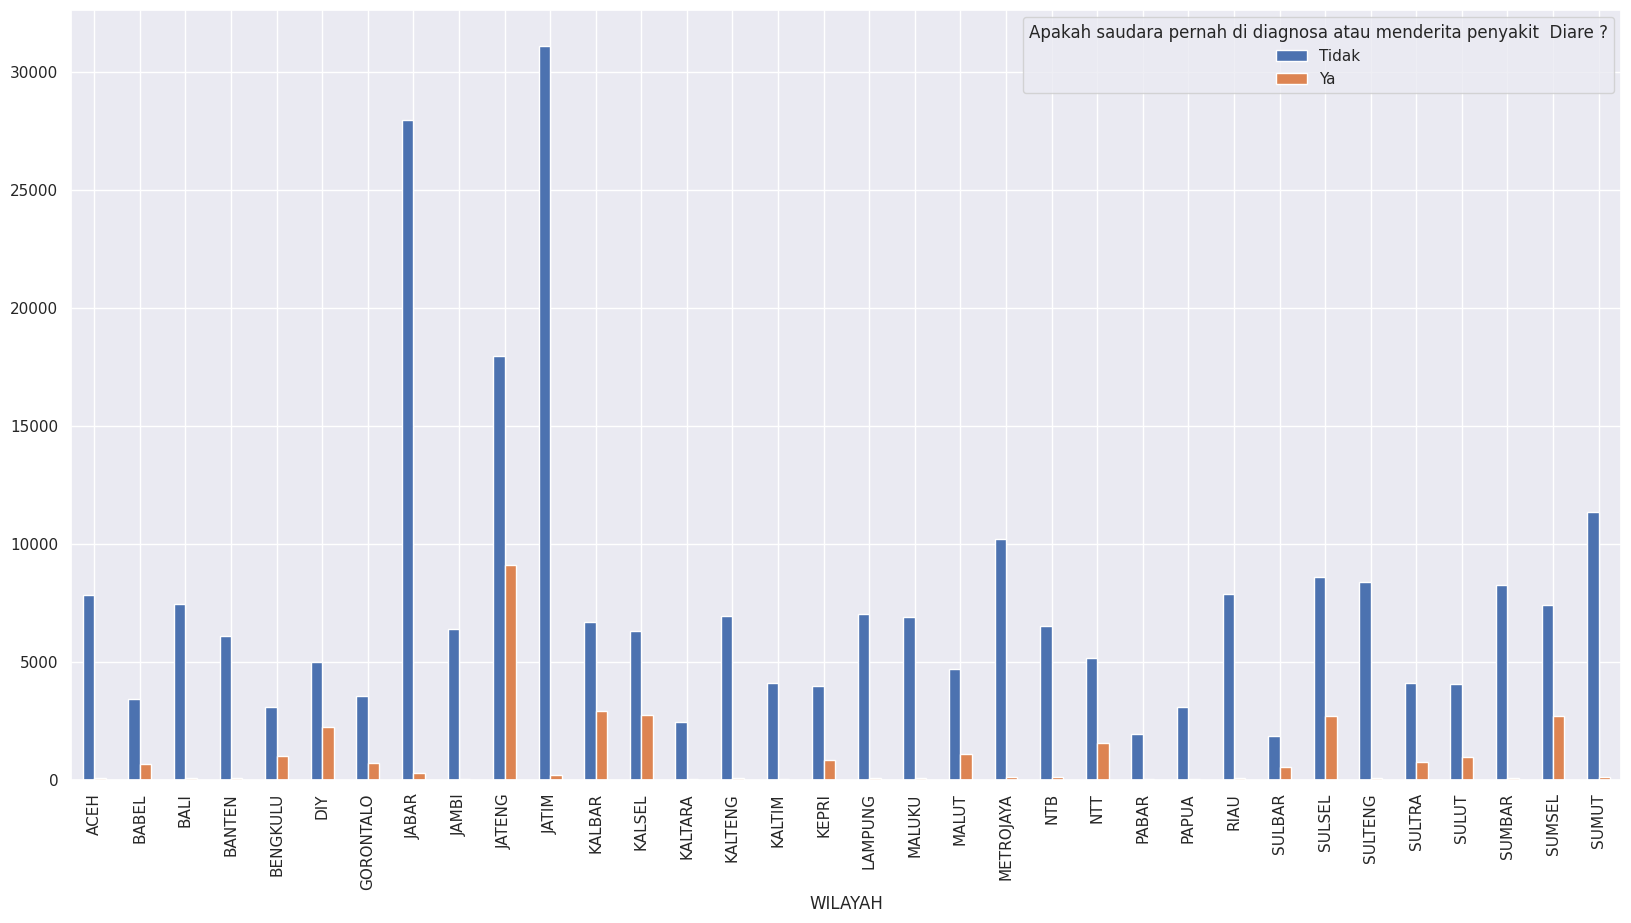

In [ ]:
CrosstabResult=pd.crosstab(index=data2['WILAYAH'],columns=data2['Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?'])
CrosstabResult.plot.bar(figsize=(20,10))

Berdasarkan ouput di atas, dapat diketahui bahwa kasus terjadinya individu terdiagnosis diare paling banyak terdapat di Provinsi Jawa Tengah.